# Loading Data

In [2]:
from google.colab import files

uploaded = files.upload()

from google.colab import drive
drive.mount("/content/drive/",force_remount=True)
# # !unzip /content/drive/MyDrive/Thesis-1/Thesis1.1/CB4.zip -d /content/
!pip install --upgrade gensim

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [16]:
import pandas as pd
# mytext  = open('/content/saraiki_news (3).txt', 'r',encoding='utf-8')
# df= pd.read_csv('/content/CB4.csv.csv',encoding='UTF-8')
# df2 = pd.read_csv('/content/WikiSaraiki.csv',encoding='UTF-8')
df = pd.read_csv('/content/Saraiki_corpus.csv',encoding='UTF-8')

In [17]:
len(df)

128998

# Preprocessing

In [18]:
!pip install urduhack['tf']
import urduhack
urduhack.download()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.2 MB/s 
     |████████████████████████████████| 3.4 MB 35.8 MB/s 
     |████████████████████████████████| 1.1 MB 40.8 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1
98304/89078 [=================================] - 0s 2us/step


In [19]:
sub_char = r'''ÆÁÂÂÀÅÃÄÇÐÉÊÈËÍÎÌÏÑÓÔÒØÕÖÞÚÛÙÜÝáâæàåãäçéêèðëíîìïñóôòøõößþúûùüýÿĀāĂăĄąĆćĈĉĊċČčĎďĐđĒēĔĕĖėĘęĚěĜĝĞğĠġĢģĤĥĦħĨĩĪīĬĭĮįİıĲĳĴĵĶķĸĹĺĻļĽľĿŀŁłŃńŅņŇňŊŋŌōŎŏŐőŒœŔŕŖŗŘřŚśŜŝŞşŠšŢţŤťŦŧŨũŪūŬŭŮůŰűŲųŴŵŶŷŸŹźŻżŽžſŉ$¢€£¥₩₽₹¤₱₦ƒ₮৲৳₨௹฿៛₪₫₭₲₴₵﷼≋₿ŁÐ₳§¶❡⁋※〈〉《》•…·¡¿¦¨¯´·¸º‽‼⁏※†‡ˉ˘⁇⁈⁉ˆ⁊⸘ΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡΣⅠⅡⅢⅣⅤⅥⅦⅧⅨⅩⅪⅫⅰⅱⅲⅳⅴⅵⅶⅷⅸⅹⅺⅻ⓪①②③④‱№℗℠℡☰≡Ξ㊂≣⁝⋮︙⦙⁞⋯…∷▲▼▶△▽▷⌃⌄︿﹀︽♡♢♤♧♣♦♥♠︾⌵𓏬𓃑𓏧⸬♓♒♑♐♏♎♍♌♋♊♉♈☉☽☿♀⊕♁♂♃♄♅⛢♆♇ˇ∛∜⍻☐☑☒✓✔✗✘༝྾∨√℻℀℁℅℆⅍⌚⌛☊☎☏✁✂✃✄✆✇✈✉✍✎✏✐✑✒™©®‰§¶𓍝⏎⇧⏏⌂⌘☢☣⎋⌥⌫ᵁᴴᴰ⌖⑤⑥⑦⑧⑨⑩⓵⓶⓷⓸⓹⓺⓻⓼⓽⓾⑴⑵⑶⑷⑸⑹⑺⑻⑼⑽⓿❶❷❸❹❺❻❼❽❾❿㈠㈡㈢㈣㈤㈥㈦㈧㈨㈩㊀㊁㊂㊃㊄㊅㊆㊇㊈㊉μ°℃℉㎍㎎㎏℥㏌㎚㎛㎜㎝㎞²³㎖㎗㎘㏄㏖㏒㎅㎆㎇㎈㎉㎐㎑㎒㎓㎾Ω㏑㏈㏐㏂㏘㎳㎭㏅㎪㏗
ΤΥΦΧΨΩαβγδεζηθικλμνξοπρςστυφχψωΠπ𝜫𝝅𝝥𝝿𝞟𝞹Пп∏ϖ∐ℼㄇ兀「」『』【】〔〕︵︶︷︸︹︺︻︼︽︾︿﹀﹁﹂﹃﹄½⅓⅔¼¾⅕⅖⅗⅘⅙⅚↕↖↗↘↙↚↛↜↝↞↟↠↡↢↣↤↥↦↧↨↩↪↫↬↭↮↯↰↱↲↳↴↶↷↸↹↺↻⟳↼↽↾↿⇀⇁⇂⇃⇄⇅⇆⇇⇈⇉⇊⇋⇌⇍⇎⇏⇕⇖⇗⇘⇙⇚⇛⇜⇝⇞⇟⇠⇡⇢⇣⇤⇥⇦⇧⇨⇩⇪⌅⌆⌤⏎▶☇☈➔➘➙➚➛➜➝➞➟➠➡➢➣➤➥➦➧➨➩➪➫➬➭➮➯ღ•⁂€™↑→↓⇝√∞░▲▶◀●☀☁☂☃☄★☆☉☐☑☎☚☛☜☝☞☟☠☢☣☪☮☯♔♕♖♗♘♙♚♛♜♝♞♟♩♪♫♬♭♮♯𝄞𝄡𝄢𝄪𝄫🎵🎶🎼𓏢ϟ☀☁☂☃☄☉☼☽☾♁♨❄❅❆༄࿓☸☹☺☻☼☽☾♔♕♖♗♘♚♛♜♝♞♟♡♨♩♪♫♬✈✉✍✎✓✔✘✚✞✟✠✡✦✧✩✪✮✯✹✿❀❁❂❄❅❆❝❞❣❤❥❦➤➱➲➳➴➵➶➷➸➹➺➻➼➽➾⤴⤵↵↓↔←→↑⍇⍈⍐⍗⇫⇬⇭⇮⇯⇰⇱⇲⇳⇴⇵⇶⇷⇸⇹⇺⇻⇼⇽⇾⇿⇐⇑⇒⇓⇔⅐⅛⅜⅝⅞⅑⅒↉⅟∟∬∭∮∵∷≦≧≋╳✕✖✚﹢﹣﹤﹥％＋－／＝∧∠∩∪°÷≡≥∞∫≤≠∨‰‱⊥π±√∑∴×¬﹙﹚﹛﹜﹝﹞﹤﹥（）＜＞｛｝❬❭❮❯❰❱〖〗〘〙〚〛⟨⟩‹›«»｢｣⌃⌄⌵«»‘’‚‛“”„‟‹›❛❜❝❞〝〞〟〃＂＇′″`ˊ―—–'''
a_special = [i for i in sub_char]

In [20]:
a_special

['Æ',
 'Á',
 'Â',
 'Â',
 'À',
 'Å',
 'Ã',
 'Ä',
 'Ç',
 'Ð',
 'É',
 'Ê',
 'È',
 'Ë',
 'Í',
 'Î',
 'Ì',
 'Ï',
 'Ñ',
 'Ó',
 'Ô',
 'Ò',
 'Ø',
 'Õ',
 'Ö',
 'Þ',
 'Ú',
 'Û',
 'Ù',
 'Ü',
 'Ý',
 'á',
 'â',
 'æ',
 'à',
 'å',
 'ã',
 'ä',
 'ç',
 'é',
 'ê',
 'è',
 'ð',
 'ë',
 'í',
 'î',
 'ì',
 'ï',
 'ñ',
 'ó',
 'ô',
 'ò',
 'ø',
 'õ',
 'ö',
 'ß',
 'þ',
 'ú',
 'û',
 'ù',
 'ü',
 'ý',
 'ÿ',
 'Ā',
 'ā',
 'Ă',
 'ă',
 'Ą',
 'ą',
 'Ć',
 'ć',
 'Ĉ',
 'ĉ',
 'Ċ',
 'ċ',
 'Č',
 'č',
 'Ď',
 'ď',
 'Đ',
 'đ',
 'Ē',
 'ē',
 'Ĕ',
 'ĕ',
 'Ė',
 'ė',
 'Ę',
 'ę',
 'Ě',
 'ě',
 'Ĝ',
 'ĝ',
 'Ğ',
 'ğ',
 'Ġ',
 'ġ',
 'Ģ',
 'ģ',
 'Ĥ',
 'ĥ',
 'Ħ',
 'ħ',
 'Ĩ',
 'ĩ',
 'Ī',
 'ī',
 'Ĭ',
 'ĭ',
 'Į',
 'į',
 'İ',
 'ı',
 'Ĳ',
 'ĳ',
 'Ĵ',
 'ĵ',
 'Ķ',
 'ķ',
 'ĸ',
 'Ĺ',
 'ĺ',
 'Ļ',
 'ļ',
 'Ľ',
 'ľ',
 'Ŀ',
 'ŀ',
 'Ł',
 'ł',
 'Ń',
 'ń',
 'Ņ',
 'ņ',
 'Ň',
 'ň',
 'Ŋ',
 'ŋ',
 'Ō',
 'ō',
 'Ŏ',
 'ŏ',
 'Ő',
 'ő',
 'Œ',
 'œ',
 'Ŕ',
 'ŕ',
 'Ŗ',
 'ŗ',
 'Ř',
 'ř',
 'Ś',
 'ś',
 'Ŝ',
 'ŝ',
 'Ş',
 'ş',
 'Š',
 'š',
 'Ţ',
 'ţ',
 'Ť',
 'ť',
 'Ŧ',
 'ŧ',
 'Ũ'

In [21]:
import re
# text cleaning and pre-processing:
def delete_urdu_english_symbols(sentences):
    cleaned = []
    for sentence in sentences:
        text = re.sub(r"\d+", " ", sentence)
        # English punctuations
        text = re.sub(r"""[!"#$%&'()*+—,-./:;<=>?@[\]^_`{|}~]+""", " ", text)
        # replacing ءچ
        char = r'ءچ'
        text = re.sub(char,"اچ", text)
        char = r'دء'
        text = re.sub(char,"دے", text)
              # char=r'ھ'
        # text = re.sub(char,"ہے", text)
        # char=r'ھ۔'
        # text = re.sub(char,"ہے", text)

        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        text = re.sub(sub_char,"",text)
        # Urdu punctuations
        text = re.sub(r"[“”’ء۔؟‘٭،]+", " ", text)
        # Arabic numbers
        text = re.sub(r"[٠‎١‎٢‎٣‎٤‎٥‎٦‎٧‎٨‎٩]+", " ", text)
        # text = re.sub(r"[^\w\s]", " ", text)
        # Remove English characters and numbers.
        text = re.sub(r"[a-zA-z0-9]+", " ", text)
        # remove remove_accents
        # text = re.sub(r'[]+')
        # remove multiple spaces.
        text = re.sub(r" +", " ", text)
        text = text.split(" ")
        # some stupid empty tokens should be removed.
        text = [t.strip() for t in text if t.strip()]
        cleaned.append(" ".join(text))
    return cleaned

In [22]:
# currentWord = "وفاقی وزیر اطلاعات و نشریات چوہدری فواد حسین آکھیے جو ڈرامہ فلم اتے ڈیجیٹل میڈیا نال اپݨی کہانی ڄڳ تئیں پچائی ونڄ سڳدی اے ماضی اچ پاکستان فلمی صںعت اچ وݙا ملک ہا بھل مناسب توجہ نہ ہووݨ پاروں اے صںعت زار و قطار زوال کر ڳئی اے ساݙی حکومت فلمی صںعت کوں نشیب و فراز آن بحال کیتے اتے ودھ مراعات ݙتن نشیب و فراز۔"

# # guess = "و"
# # indices = []
# # occurrences = currentWord.count(guess)
# # for i, a in enumerate(currentWord):
# #    if a == guess:
# #      if currentWord[i-1]==" " and currentWord[i+1]==" ":
# #        indices.append(i)


# # print(indices)

In [23]:

def combine_word(curr):
  temp = ''
  sample_str=''
  guess = "و"
  indices = []
  occurrences = curr.count(guess)
  # print(occurrences)
  for i, a in enumerate(curr):
    if i!=0 and i!=len(curr)-1:
      if a == guess:
        if curr[i-1]==" " and curr[i+1]==" ":
          indices.append(i)
  if len(indices)==1:
    n = indices[0]
    replacement = "_و_"
    # Replace character at nth index position
    sample_str = curr[0:n-1] + replacement + curr[n+2: ]
    return sample_str
  elif len(indices)>1:
    for i in range(len(indices)):
      n=indices[i]
      # print(n)
      replacement = "_و_"
      # print(i)
      if i==0:
        sample_str = curr[0:n-1] + replacement + curr[n+2:]       
      else:
        sample_str = sample_str[0:n-1] + replacement + sample_str[n+2:]
      if i==len(indices)-1:
        return sample_str
        # break
  else:
    return curr


In [24]:
# d = combine_word(currentWord)
# d

In [25]:
# s = delete_urdu_english_symbols(mytext.readlines())
from urduhack.preprocessing import remove_accents
from urduhack.normalization import remove_diacritics

def clean_dia_acce(text):
  cleared_diacritics_accents  = []
  for i in text:
    if i!='':
      ac = remove_accents(i)
      di = remove_diacritics(ac)
      cleared_diacritics_accents.append(di)
  return cleared_diacritics_accents 
    
# cleaned_sentences  = [combine_word(i) for i in clean_dia_acce(delete_urdu_english_symbols(mytext.readlines())) if str(i)!='' and str(i)!=None]


In [26]:
# new = [i for i in df['Saraiki'].values.tolist()]
# new1 = [combine_word(i) for i in clean_dia_acce(delete_urdu_english_symbols(new)) if str(i)!='' and str(i)!=None]
# cleaned_sentences.extend(new1)

In [27]:
# new = [i for i in df2['Saraiki'].values.tolist()]
# new1 = [combine_word(i) for i in clean_dia_acce(delete_urdu_english_symbols(new)) if str(i)!='' and str(i)!=None]
# cleaned_sentences.extend(new1)

In [28]:
# cleaned_sentences

In [29]:
# len(cleaned_sentences)

In [30]:
import re
# text cleaning and pre-processing:
def delete_urdu_english_symbols2(sentence):
      text = re.sub(r"\d+", " ", sentence)
        # English punctuations
      text = re.sub(r"""[!"#$%&'()*+—,-./:;<=>?@[\]^_`{|}~]+""", " ", text)
        # replacing ءچ
      char = r'ءچ'
      text = re.sub(char,"اچ", text)
      char = r'دء'
      text = re.sub(char,"دے", text)
        # Urdu punctuations
      text = re.sub(r"[“”’ء۔؟‘٭،]+", " ", text)
      emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
      text = emoji_pattern.sub(r'', text)
        # Arabic numbers
      text = re.sub(r"[٠‎١‎٢‎٣‎٤‎٥‎٦‎٧‎٨‎٩]+", " ", text)
        # text = re.sub(r"[^\w\s]", " ", text)
        # Remove English characters and numbers.
      text = re.sub(r"[a-zA-z0-9]+", " ", text)
        # remove remove_accents
        # text = re.sub(r'[]+')
        # remove multiple spaces.
      text = re.sub(r" +", " ", text)
      text = text.split(" ")
        # some stupid empty tokens should be removed.
      text = [t.strip() for t in text if t.strip()]
      return " ".join(text)

In [31]:
from spacy.lang.ur import Urdu
nlp = Urdu()
nlp.add_pipe('sentencizer')
# d = 'فائربریگیڈ دی چار گڈیاں نے ݙو گھنٹے دی کوششاں دے بعد بھا تے قابو پا گھیدا بھا اتنی ھائی کہ پرے توں بھا دی لٹیاں ݙکھائی ݙیندیاں پیاں ھن ریجنل کنٹرول سینٹر جامشور دے مطابق ھک سو بتری کے وی دے ٹرانسفارمر اچ اسپارک دی وجہہ نال دھماکے تھئے تے بھا بھڑکی ۔ ترجمان کے الیکٹرک دے مطابق نیشنل گرڈ توں بجلی دی بحال دے پاروں کراچی دی بجلی دی صورتحال اچ قدرے بہتری آئی ھ ھن میگا واٹ بجلی فراہم کیتی ویندی پعی ھ رھائش علاقیاں اچ لوڈ منیجمنٹ وی نی کیتی ویندی پئی ۔'
sentences = []
# for i in cleaned_sentences:
for i in df['Saraiki']:
  if i!='' and i!=' ' and i!='\n' and i!='\t':
    doc = nlp(str(i))
    for sent in doc.sents:
      if str(sent)!='' and str(sent)!=' '  and str(sent)!='\n'  and str(sent)!='\t':
        sentences.append([delete_urdu_english_symbols2(str(sent).strip())])

In [32]:
sentences[0]

['بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے زخمی تھئ گئے']

In [33]:
cleaned_sentences = [[combine_word(j)] for i in sentences for j in clean_dia_acce(i)]

In [34]:
sentences = cleaned_sentences

In [35]:
sentences

[['بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے زخمی تھئ گئے'],
 ['پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ گئے'],
 ['زخمیاں دی مرحم پٹی کیتے جام غلام قدر ہسپتال منتقل کر ݙیتا گئے ہسپتال دے ایم ایس ڈاکٹر عباس لاسی نے ݙسایا کہ دھماکے نال سڑن والے مزدوراں کوں ہسپتال گھن تے آیا گئے جئیں اچون چار دی حالت صحیح کینی انہاں دا آکھݨ ھا کہ تمام مزدوراں کون طبی امداد ݙیوݨ دے بعد کراچی دے سول ہسپتال منتقل کر ݙیتا گئیا ھ ایں تو پہل بلوچستان دے گھراں اچ گیس لیکج دی وجہہ نال مرݨ دے کافی واقعے سامنڑیں آ چکے ھن ایں مہینے دے آغاز اچ کوئٹہ دے عبدالرزاق ٹاون دے ھک گھر اچ گیس دی لیکیج دی وجہہ نال دھماکا تھیا ھا جیندے نتیجے اچ ڈو عورتاں زخمی تھئیاں ھن جنہاں کوں ہسپتال منتقل کر ݙیتا گئیا ھا'],
 ['پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی گئی گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن'],
 ['نیشنل کما

In [36]:
len(sentences)

128998

In [40]:
!pip install emoji
!pip install emot

import emoji
word_list = []
# from emoji import UNICODE_EMOJI
from emot.emo_unicode import UNICODE_EMOJI


stop_words = ['۔','؟']
for i in sentences:
  for j in i:
    if j!='' and j!='\n' and j!=' ' and j!='\t' and j!=None:
      doc = nlp(j)
      word_list.append([word.text for word in doc if word.text not in stop_words and word.text not in UNICODE_EMOJI])
# for i, j in enumerate(word_list):
#   for k,l in enumerate(j):
#     if l=='ھ':
#       print(i,k) #list index and inside list item index
#       word_list[i][k] = 'ہے'
for i, j in enumerate(word_list):
  for k,l in enumerate(j):
    if l=='ھ۔':
      print(i,k) #list index and inside list item index
      word_list[i][k] = 'ہے۔'
# for i,j in enumerate(word_list):
#   if j!=None:
#     for k,l in enumerate(j):
#       word_list[i][k]=word_list[i][k].replace("_"," ")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 20 kB/s 


In [ ]:
for i in word_list:
  for j in i:
    if j=='اطلاعات و نشریات':
      print(j)

In [ ]:
#word_list_cleaned = [[" ".join(i)] for i in word_list]

In [ ]:
for i in word_list:
  for j in i:
    if j=='' or j==None:
      print(i)

In [ ]:
# f = open("Saraiki_Corpus.txt", "a",encoding='utf-8')
# for i in sentences:
#   for j in i:
#     f.write(j + "\n")
# f.close()

In [ ]:
# data = [j for i in sentences for j in i]
# df_corpus = pd.DataFrame({'Saraiki':data})

In [ ]:
# df_corpus.to_csv('Saraiki_corpus.csv',encoding='utf-8',index=False)

In [ ]:
# word_freq = dict()
# for sent in word_list:
#     for i in sent:
#         word_freq[i] += 1
# len(word_freq)

#CBOW

In [155]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 189 µs (started: 2022-07-16 21:53:53 +00:00)


In [156]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

modelc1 = Word2Vec(min_count=1,window=2,vector_size=50,workers=cpu_count())
modelc2 = Word2Vec(min_count=1,window=2,vector_size=100,workers=cpu_count())
modelc3 = Word2Vec(min_count=1,window=2,vector_size=200,workers=cpu_count())
modelc4 = Word2Vec(min_count=1,window=2,vector_size=300,workers=cpu_count())
modelc5 = Word2Vec(min_count=1,window=2,vector_size=400,workers=cpu_count())

# model1.save("word2vec.model")

time: 151 ms (started: 2022-07-16 21:53:58 +00:00)


In [ ]:
# model1.train(word_list,total_examples=model1.corpus_count, epochs=100)

In [ ]:
# model1.train(word_list,total_examples=model1.corpus_count, epochs=model1.iter) for updating model

In [ ]:
from time import time  # To time our operations

# t = time()
modelc1.build_vocab(word_list, progress_per=10000)
modelc2.build_vocab(word_list, progress_per=10000)
modelc3.build_vocab(word_list, progress_per=10000)
modelc4.build_vocab(word_list, progress_per=10000)
modelc5.build_vocab(word_list, progress_per=10000)

# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))# model1.train(word_list,total_examples=model1.corpus_count, epochs=100,compute_loss=True)

time: 42.1 s (started: 2022-06-20 08:11:18 +00:00)


In [ ]:
modelc1.train(word_list, total_examples=modelc1.corpus_count, epochs=100, report_delay=1,compute_loss=True)
# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
from gensim.models import KeyedVectors
modelc1.wv.save('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors50.kv')
reloaded_word_vectors = KeyedVectors.load('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors50.kv')


time: 7min 11s (started: 2022-06-20 08:12:02 +00:00)


In [ ]:
reloaded_word_vectors.most_similar(positive=["دھندلݨ"])

[('ٻرچھݨ', 0.9675674438476562),
 ('دنڑکݨ', 0.9667102098464966),
 ('دھندیجݨ', 0.9636746048927307),
 ('لٻݨ', 0.9611132740974426),
 ('سلاہوݨ', 0.9600993990898132),
 ('گنجڑیجݨ', 0.9597641229629517),
 ('واکݨ', 0.9595964550971985),
 ('سلاٻݨ', 0.9594851732254028),
 ('سوہڑݨ', 0.9593262076377869),
 ('ونڑجاوݨ', 0.958407998085022)]

time: 175 ms (started: 2022-06-20 08:33:52 +00:00)


In [ ]:
!pip install aspose-words

In [ ]:
# !pip install svgwrite

In [ ]:
# import svgwrite

# dwg = svgwrite.Drawing('test.svg', profile='tiny')
# dwg.add(dwg.line((0, 0), (10, 0), stroke=svgwrite.rgb(10, 10, 16, '%')))
# dwg.add(dwg.text('Test', insert=(0, 0.2), fill='red'))
# dwg.save()

In [ ]:
modelc2.train(word_list, total_examples=modelc2.corpus_count, epochs=100, report_delay=1,compute_loss=True)
# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
modelc2.wv.save('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors100.kv')


time: 6min 41s (started: 2022-06-20 08:35:23 +00:00)


In [ ]:
modelc3.train(word_list, total_examples=modelc3.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelc3.wv.save('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors200.kv')

# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

time: 7min 51s (started: 2022-06-20 08:42:04 +00:00)


In [ ]:
modelc4.train(word_list, total_examples=modelc4.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelc4.wv.save('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors300.kv')

# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

time: 9min 25s (started: 2022-06-20 08:49:56 +00:00)


In [ ]:
modelc5.train(word_list, total_examples=modelc5.corpus_count, epochs=100, report_delay=1,compute_loss=True)
# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))


time: 11min 3s (started: 2022-06-20 08:59:23 +00:00)


In [ ]:
# reloaded_word_vectors = KeyedVectors.load('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors100.kv')
# reloaded_word_vectors = KeyedVectors.load('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors200.kv')
# reloaded_word_vectors = KeyedVectors.load('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors300.kv')
# reloaded_word_vectors = KeyedVectors.load('/content/drive/MyDrive/Thesis2/Vectors/w_cbow_vectors400.kv')


time: 1.71 s (started: 2022-06-20 09:10:26 +00:00)


In [ ]:
# model1.get_latest_training_loss()

In [ ]:
modelc1.save("/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vec_50_Cbow.model")
modelc2.save("/content/drive/MyDrive/Thesis-1/skr_word2vec_100_embeddings_Cbow/word2vec_100_Cbow.model")
modelc3.save("/content/drive/MyDrive/Thesis-1/skr_word2vec_200_embeddings_Cbow/word2vec_200_Cbow.model")
modelc4.save("/content/drive/MyDrive/Thesis-1/skr_word2vec_300_embeddings_Cbow/word2vec_300_Cbow.model")
modelc5.save("/content/drive/MyDrive/Thesis-1/skr_word2vec_400_embeddings_Cbow/word2vec_400_Cbow.model")

modelc1.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vec2_50_Cbow.model")
modelc2.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_word2vec_100_embeddings_Cbow/word2vec2_100_Cbow.model")
modelc3.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_word2vec_200_embeddings_Cbow/word2vec2_200_Cbow.model")
modelc4.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_word2vec_300_embeddings_Cbow/word2vec2_300_Cbow.model")
modelc5.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_word2vec_400_embeddings_Cbow/word2vec2_400_Cbow.model")

import gensim
import gensim.scripts
import gensim.scripts.word2vec2tensor


In [ ]:
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vec2_50_Cbow.model','/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/skr_word2vec_50_embeddings_Cbow')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_word2vec_100_embeddings_Cbow/word2vec2_100_Cbow.model','/content/drive/MyDrive/Thesis-1/skr_word2vec_100_embeddings_Cbow/skr_word2vec_100_embeddings_Cbow')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_word2vec_200_embeddings_Cbow/word2vec2_200_Cbow.model','/content/drive/MyDrive/Thesis-1/skr_word2vec_200_embeddings_Cbow/skr_word2vec_200_embeddings_Cbow')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_word2vec_300_embeddings_Cbow/word2vec2_300_Cbow.model','/content/drive/MyDrive/Thesis-1/skr_word2vec_300_embeddings_Cbow/skr_word2vec_300_embeddings_Cbow')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_word2vec_400_embeddings_Cbow/word2vec2_400_Cbow.model','/content/drive/MyDrive/Thesis-1/skr_word2vec_400_embeddings_Cbow/skr_word2vec_400_embeddings_Cbow')


In [ ]:
# model1 =Word2Vec.load("word2vec_Cbow.model")

# Exploring the model

In [ ]:
modelc1.wv.most_similar(['اطلاعات_و_نشریات'])

In [ ]:
len(modelc1.wv['شہنشاہ'])

In [ ]:
import numpy as np
np.set_printoptions(threshold=np. inf)
print(modelc2.wv['شہنشاہ'])

In [ ]:
import numpy as np
np.set_printoptions(threshold=np. inf)
print(modelc2.wv['بادشاہ'])

In [ ]:
from scipy import spatial
result = 1 - spatial.distance.cosine(modelc2.wv['بادشاہ'], modelc2.wv['شہنشاہ'])
print(result)

In [ ]:
from numpy import dot
from numpy.linalg import norm
result = dot(modelc2.wv['بادشاہ'], modelc2.wv['شہنشاہ'])/(norm(modelc2.wv['بادشاہ'])*norm(modelc2.wv['شہنشاہ']))
print(result)

In [ ]:
len(modelc2.wv['شہنشاہ'])

In [ ]:
np.set_printoptions(threshold=np. inf)
print(modelc2.wv['شہنشاہ'])

In [ ]:
len(modelc3.wv['شہنشاہ'])

In [ ]:
modelc1.wv.most_similar(positive=["بادشاہ"])

In [ ]:
modelc2.wv.most_similar(positive=["بادشاہ"])

In [ ]:
modelc3.wv.most_similar(positive=["بادشاہ"])

In [ ]:
modelc4.wv.most_similar(positive=["بادشاہ"])

In [ ]:
modelc5.wv.most_similar(positive=["بادشاہ"])

In [ ]:
modelc1.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

In [ ]:
modelc2.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

In [ ]:
modelc3.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

In [ ]:
modelc4.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

In [ ]:
modelc5.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

In [ ]:
modelc1.wv.doesnt_match(['کار', 'ویگن', 'بس', 'گھوڑا'])

# Cosine Similarities

In [ ]:
modelc1.wv.similarity("کار", "سواری")

0.17536445

time: 4.63 ms (started: 2022-03-13 23:19:17 +00:00)


In [ ]:
modelc2.wv.similarity("کار", "سواری")

-0.024378128

time: 4.42 ms (started: 2022-03-13 23:19:18 +00:00)


In [ ]:
modelc3.wv.similarity("کار", "سواری")

0.023699122

time: 3.83 ms (started: 2022-03-13 23:19:19 +00:00)


In [ ]:
modelc4.wv.similarity("کار", "سواری")

0.016652802

time: 13.8 ms (started: 2022-03-13 23:20:50 +00:00)


In [ ]:
modelc5.wv.similarity("کار", "سواری")

0.039393675

time: 4.58 ms (started: 2022-03-13 23:20:57 +00:00)


In [ ]:
# model1.wv.save_word2vec_format("/content/word2vec2_Cbow.model")

In [ ]:
# import gensim
# gensim.scripts.word2vec2tensor.word2vec2tensor('/content/word2vec2_Cbow.model','/content/drive/MyDrive/Thesis-1/skr_cbow_embedding_300')

In [ ]:
# model.wv.predict_output_word(context_words_list, topn=10) #Cbow or skipgram
modelc1.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('مہم', 0.008348992),
 ('تحقیقات', 0.002020765),
 ('اقلیتاں', 0.0013327698),
 ('کوششاں', 0.0012054667),
 ('اھداف', 0.0011093764),
 ('مذاکرات', 0.0009561884),
 ('مسلسل', 0.0009195419),
 ('کارروائی', 0.0008985019),
 ('شکایت', 0.000880039),
 ('تقریبات', 0.00081412215)]

time: 9.7 ms (started: 2022-03-13 23:21:13 +00:00)


#    احتجاج دی بنڑاوݨ شروع

In [ ]:
modelc2.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('مہم', 0.010488091),
 ('شدید', 0.0032488855),
 ('احتجاج', 0.002855307),
 ('موثر', 0.0021378663),
 ('جنگ', 0.0017431692),
 ('بمباری', 0.001583585),
 ('سلسلہ', 0.0015795222),
 ('عزم', 0.0014470281),
 ('بھرپور', 0.0014260896),
 ('امن', 0.0013077714)]

time: 13.6 ms (started: 2022-03-13 23:21:15 +00:00)


In [ ]:
modelc3.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('احتجاج', 0.010940227),
 ('مہم', 0.008169361),
 ('سلسلہ', 0.008164806),
 ('تحقیقات', 0.005344066),
 ('دیخلاف', 0.0038762086),
 ('ویڈیو', 0.0029928305),
 ('تیاری', 0.0024681387),
 ('شدید', 0.0019723452),
 ('کوششاں', 0.0014094409),
 ('موثر', 0.00137256)]

time: 18.3 ms (started: 2022-03-13 23:21:17 +00:00)


In [ ]:
modelc4.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('سلسلہ', 0.011509219),
 ('بجائے', 0.00879005),
 ('ویڈیو', 0.0068420214),
 ('احتجاج', 0.0048141456),
 ('دیخلاف', 0.0037294996),
 ('مہم', 0.003426069),
 ('جدوجہد', 0.0021331797),
 ('احتجاجی', 0.0018379294),
 ('جلسے', 0.0016832489),
 ('عادت', 0.001530249)]

time: 18.3 ms (started: 2022-03-13 23:21:19 +00:00)


In [ ]:
modelc5.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('ویڈیو', 0.005488626),
 ('شروع', 0.003829782),
 ('تحقیقات', 0.0029915855),
 ('آمد', 0.0028901803),
 ('شدید', 0.0020589395),
 ('ڈیتی', 0.0016297646),
 ('سلسلہ', 0.0014648547),
 ('احتجاج', 0.0012996562),
 ('دیخلاف', 0.0012723242),
 ('بجائے', 0.001226261)]

time: 24.6 ms (started: 2022-03-13 23:21:20 +00:00)


In [ ]:
modelc1.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vector-50-cbow.bin')
modelc2.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_100_embeddings_Cbow/word2vector-100-cbow.bin')
modelc3.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_200_embeddings_Cbow/word2vector-200-cbow.bin')
modelc4.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_300_embeddings_Cbow/word2vector-300-cbow.bin')
modelc5.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_400_embeddings_Cbow/word2vector-400-cbow.bin')

time: 3.44 s (started: 2022-03-09 19:18:53 +00:00)


In [ ]:
modelc1.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vector-50-cbow-vectors.kv')
modelc2.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vector-100-cbow-vectors.kv')
modelc3.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vector-200-cbow-vectors.kv')
modelc4.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vector-300-cbow-vectors.kv')
modelc5.wv.save('/content/drive/MyDrive/Thesis-1/skr_word2vec_50_embeddings_Cbow/word2vector-400-cbow-vectors.kv')

time: 2.96 s (started: 2022-03-09 19:18:56 +00:00)


In [ ]:
modelc1.wv.most_similar(positive=['ویکسینیشن'])

KeyError: ignored

time: 20.4 ms (started: 2022-03-13 23:21:43 +00:00)


In [ ]:
wordsim = pd.read_csv('/content/wordsim353_Saraiki.tsv',sep='\t',header=None)

time: 19.2 ms (started: 2022-04-03 10:52:54 +00:00)


In [ ]:
new_sim = pd.DataFrame({'Word1':wordsim[0][2:],'Word2':wordsim[1][2:],'Human Score':wordsim[2][2:]})

time: 13.8 ms (started: 2022-04-03 10:52:54 +00:00)


In [ ]:
new_sim.reset_index(inplace=True)

time: 4.86 ms (started: 2022-04-03 10:52:54 +00:00)


In [ ]:
h_div = []
for i in new_sim['Human Score']:
  h_div.append((float("{:.3f}".format(float(i)/10))))
new_sim['Human Score Divided By 10'] = h_div

time: 3.96 ms (started: 2022-04-03 10:52:54 +00:00)


In [ ]:
def find_c_sims(model,text):
  c_sims = []
  for i,j in zip(new_sim['Word1'],new_sim['Word2']):
    try:
      c_sims.append(float("{:.3f}".format(model.wv.similarity(i,j))))
    except:
      c_sims.append(float("{:.3f}".format(0.0)))
  new_sim['Cosine Sim'] = c_sims

time: 11.1 ms (started: 2022-04-03 10:52:54 +00:00)


In [ ]:
find_c_sims(modelc1)

time: 25.4 ms (started: 2022-03-18 08:43:21 +00:00)


In [ ]:
new_sim

,level_0,index,Word1,Word2,Human Score,Human Score Divided By 10,Cosine Sim
0,0,2,محبت,میل جول,6.77,0.677,0.000
1,1,3,بگھیلا,بِلی,7.35,0.735,0.000
2,2,4,بگھیلا,بگھیلا,10,1.000,0.000
3,3,5,کتاب,کاغذ,7.46,0.746,0.001
4,4,6,کمپیوٹر,کی بورڈ,7.62,0.762,0.000
...,...,...,...,...,...,...,...
348,348,350,واچھڑ,چھل,6.03,0.603,0.281
349,349,351,موسم,پیش گوئی,8.34,0.834,0.000
350,350,352,مصیبت,رقبہ,6.25,0.625,-0.094
351,351,353,گورنر,دفتر,6.34,0.634,0.456


time: 40.4 ms (started: 2022-03-18 08:43:23 +00:00)


In [ ]:
import scipy.stats

time: 1.04 ms (started: 2022-03-18 08:43:25 +00:00)


In [ ]:
r, p = scipy.stats.pearsonr(new_sim['Human Score Divided By 10'], new_sim['Cosine Sim'])    # Pearson's r

time: 2.49 ms (started: 2022-03-18 08:43:27 +00:00)


In [ ]:
print(r,p)

0.21666977947827104 4.038136851182665e-05
time: 6.64 ms (started: 2022-03-18 08:43:28 +00:00)


In [ ]:
# r, p = scipy.stats.pearsonr.([float(i) for i in new_sim['Human Score']], new_sim['Cosine Sim'])    # Pearson's r
print(scipy.stats.pearsonr([float(i) for i in new_sim['Human Score Divided By 10']], new_sim['Cosine Sim']))

(0.21666977947827104, 4.038136851182665e-05)
time: 2.43 ms (started: 2022-03-18 08:43:38 +00:00)


In [ ]:
r, p = scipy.stats.spearmanr(new_sim['Human Score Divided By 10'], new_sim['Cosine Sim'])    # Spearman r
print(r,p)

0.14268406019221327 0.007252264583270921
time: 5.49 ms (started: 2022-03-18 08:43:43 +00:00)


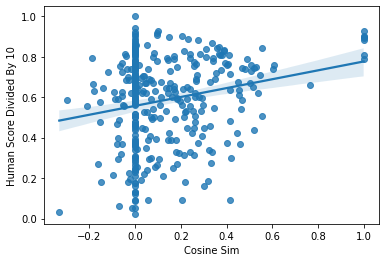

time: 344 ms (started: 2022-03-18 08:41:05 +00:00)


In [ ]:
import seaborn as sns

sns.regplot(x=new_sim['Cosine Sim'], y=new_sim['Human Score Divided By 10'])

In [ ]:
print(modelc1.wv.similarity('چھل','واچھڑ'))


0.28065503
time: 9.58 ms (started: 2022-03-18 09:29:34 +00:00)


In [ ]:
modelc1.wv.log_accuracy()

In [ ]:
modelc1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')
# correlation = modelc1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')
# pearson = correlation[0][0]
# spearman = correlation[1][0]
# oov = correlation[2]
# print(pearson)
# print(spearman)
# print(oov)

((0.3168502611262033, 7.060039118584971e-07),
 SpearmanrResult(correlation=0.2750568573624879, pvalue=1.895637249263311e-05),
 33.42776203966006)

time: 183 ms (started: 2022-03-18 08:41:06 +00:00)


In [ ]:
modelc2.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.31302855606264174, 9.747608230990506e-07),
 SpearmanrResult(correlation=0.26675007465622047, pvalue=3.432282175961175e-05),
 33.42776203966006)

time: 108 ms (started: 2022-03-13 23:21:47 +00:00)


In [ ]:
modelc3.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.31838655872085225, 6.193562798179e-07),
 SpearmanrResult(correlation=0.2664806179897712, pvalue=3.497887558077129e-05),
 33.42776203966006)

time: 107 ms (started: 2022-03-13 23:21:48 +00:00)


In [ ]:
modelc4.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3221343989651254, 4.4861989828405753e-07),
 SpearmanrResult(correlation=0.2974147089012794, pvalue=3.477257162189988e-06),
 33.42776203966006)

time: 107 ms (started: 2022-03-13 23:21:50 +00:00)


In [ ]:
modelc5.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.29908750329987005, 3.0449530284152096e-06),
 SpearmanrResult(correlation=0.24637384656445713, pvalue=0.00013580587326879006),
 33.42776203966006)

time: 112 ms (started: 2022-03-13 23:21:51 +00:00)


In [ ]:
import numpy as np
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(modelc1.wv['جرمنی'])))

for term in modelc1.wv.key_to_index():
    X[count] = modelc1[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

# It is recommended to use PCA first to reduce to ~50 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Using TSNE to further reduce to 2 dimensions
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()

TypeError: ignored

time: 131 ms (started: 2022-03-13 23:24:00 +00:00)


In [ ]:
# from gensim.test.utils import datapath
# >>>
# wv_from_text = KeyedVectors.load_word2vec_format(datapath('word2vec_pre_kv_c'), binary=False)  # C text format
# wv_from_bin = KeyedVectors.load_word2vec_format(datapath("euclidean_vectors.bin"), binary=True

#Skip Gram

In [ ]:
models1 = Word2Vec(min_count=1,window=2,vector_size=50,workers=cpu_count(),sg=1)
models2 = Word2Vec(min_count=1,window=2,vector_size=100,workers=cpu_count(),sg=1)
models3 = Word2Vec(min_count=1,window=2,vector_size=200,workers=cpu_count(),sg=1)
models4 = Word2Vec(min_count=1,window=2,vector_size=300,workers=cpu_count(),sg=1)
models5 = Word2Vec(min_count=1,window=2,vector_size=400,workers=cpu_count(),sg=1)


time: 7.54 ms (started: 2022-05-17 21:34:52 +00:00)


In [ ]:
c=[i for i in range(1,29)]
print(models+c[0])

TypeError: ignored

In [ ]:
# model2 = Word2Vec.load("word2vecskipgram.model")
# model2.train(word_list, total_examples=1, epochs=100,compute_loss=True)
# from time import time  # To time our operations

# t = time()
models1.build_vocab(word_list, progress_per=10000)
models2.build_vocab(word_list, progress_per=10000)
models3.build_vocab(word_list, progress_per=10000)
models4.build_vocab(word_list, progress_per=10000)
models5.build_vocab(word_list, progress_per=10000)



# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

time: 15.9 s (started: 2022-05-17 21:35:01 +00:00)


In [ ]:
models1.train(word_list, total_examples=models1.corpus_count, epochs=100, report_delay=1,compute_loss=True)

# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

(200355533, 229980600)

time: 12min 39s (started: 2022-05-17 21:35:17 +00:00)


In [ ]:
models2.train(word_list, total_examples=models2.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(200358784, 229980600)

time: 11min 27s (started: 2022-05-17 21:47:56 +00:00)


In [ ]:
models3.train(word_list, total_examples=models3.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(200354374, 229980600)

time: 14min 28s (started: 2022-05-17 21:59:23 +00:00)


In [ ]:
models4.train(word_list, total_examples=models4.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(200355851, 229980600)

time: 17min 18s (started: 2022-05-17 22:13:51 +00:00)


In [ ]:
models5.train(word_list, total_examples=models5.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(200355002, 229980600)

time: 18min 47s (started: 2022-05-17 22:31:10 +00:00)


In [ ]:
models1.save("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_50/word2vec_50_skipgram.model")
models2.save("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_100/word2vec_100_skipgram.model")
models3.save("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_200/word2vec_200_skipgram.model")
models4.save("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300/word2vec_300_skipgram.model")
models5.save("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_400/word2vec_400_skipgram.model")

models1.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_50/word2vec2_50_skipgram.model")
models2.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_100/word2vec2_100_skipgram.model")
models3.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_200/word2vec2_200_skipgram.model")
models4.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300/word2vec2_300_skipgram.model")
models5.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_400/word2vec2_400_skipgram.model")

gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_50/word2vec2_50_skipgram.model','/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_50/skr_skipgram_embedding_50')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_100/word2vec2_100_skipgram.model','/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_100/skr_skipgram_embedding_100')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_200/word2vec2_200_skipgram.model','/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_200/skr_skipgram_embedding_200')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300/word2vec2_300_skipgram.model','/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300/skr_skipgram_embedding_300')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_400/word2vec2_400_skipgram.model','/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_400/skr_skipgram_embedding_400')


time: 4min 9s (started: 2022-03-09 20:29:01 +00:00)


In [ ]:
# model2 =Word2Vec.load("word2vec_skipgram.model")

In [ ]:
# models1.wv.save_word2vec_format("/content/word2vec_skipgram.model")
# import gensim
# gensim.scripts.word2vec2tensor.word2vec2tensor('/content/word2vec_skipgram.model','/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300')

In [ ]:
models1.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_50/word2vector-50-skipgram.bin')
models2.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_100/word2vector-100-skipgram.bin')
models3.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_200/word2vector-200-skipgram.bin')
models4.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300/word2vector-300-skipgram.bin')
models5.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_400/word2vector-400-skipgram.bin')


time: 3.56 s (started: 2022-03-09 20:33:11 +00:00)


In [ ]:
models1.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_50/skipgram_50_vectors.kv')
models2.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_100/skipgram_100_vectors.kv')
models3.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_200/skipgram_200_vectors.kv')
models4.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_300/skipgram_300_vectors.kv')
models5.wv.save('/content/drive/MyDrive/Thesis-1/skr_skipgram_embedding_400/skipgram_400_vectors.kv')

time: 3.71 s (started: 2022-03-09 20:33:14 +00:00)


In [ ]:
models1.wv.most_similar("کاشتکاراں")

[('کساناں', 0.735190212726593),
 ('کارکناں', 0.7074968814849854),
 ('عہدیداراں', 0.7022229433059692),
 ('شہریاں', 0.6680172085762024),
 ('عبدالروف', 0.6667674779891968),
 ('بیروٹ', 0.6481435894966125),
 ('پاپولیشن', 0.644465446472168),
 ('تےانھیں', 0.642953634262085),
 ('قرضیاں', 0.6384261250495911),
 ('ڈسٹرکٹ', 0.6353017091751099)]

time: 17.8 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models2.wv.most_similar("کاشتکاراں")

[('زمیداراں', 0.5299604535102844),
 ('گنے', 0.527472972869873),
 ('ڈالراں', 0.5253615379333496),
 ('سندھھ', 0.5249844193458557),
 ('ارباں', 0.5244802832603455),
 ('شب_و_خان', 0.5202536582946777),
 ('عوام', 0.5173202157020569),
 ('قرضیاں', 0.5159136652946472),
 ('خسار', 0.5157672166824341),
 ('ھخام', 0.5149142742156982)]

time: 34.3 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models3.wv.most_similar("کاشتکاراں")

[('زمیداراں', 0.49053600430488586),
 ('چلساں', 0.43831297755241394),
 ('نمکیات', 0.4343050718307495),
 ('مالکانہ', 0.42796188592910767),
 ('شیرپاو', 0.42699477076530457),
 ('شب_و_خان', 0.4248814582824707),
 ('گنے', 0.42256399989128113),
 ('ڳنے', 0.41971105337142944),
 ('وبہبود', 0.4170525372028351),
 ('جھیٹہ', 0.4136947989463806)]

time: 42.1 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models4.wv.most_similar("کاشتکاراں")

[('زمیداراں', 0.48700854182243347),
 ('ڳنے', 0.43779364228248596),
 ('جھیٹہ', 0.4270209074020386),
 ('شب_و_خان', 0.4215557873249054),
 ('تغیراں', 0.4026235342025757),
 ('گنے', 0.4007885456085205),
 ('مالکانہ', 0.3988725244998932),
 ('وبہبود', 0.38967257738113403),
 ('رہس', 0.3806852400302887),
 ('چلساں', 0.3798742890357971)]

time: 49.9 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models5.wv.most_similar("کاشتکاراں")

[('زمیداراں', 0.45022788643836975),
 ('شب_و_خان', 0.4021015763282776),
 ('مالکانہ', 0.3988894820213318),
 ('ڳنے', 0.3801405727863312),
 ('جھیٹہ', 0.37479135394096375),
 ('تروڑکے', 0.3728202283382416),
 ('وبہبود', 0.3718421757221222),
 ('امپریشن', 0.37005412578582764),
 ('گنے', 0.3637857735157013),
 ('اقرر', 0.3587421476840973)]

time: 65.6 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models1.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

[('اٹھواں', 0.6979500651359558),
 ('آخی', 0.6824160814285278),
 ('شہنشاہ', 0.6767471432685852),
 ('مخیتار', 0.6697550415992737),
 ('جوئیم', 0.6687450408935547),
 ('نہویں', 0.6621392369270325),
 ('لقب', 0.6599301695823669),
 ('ہندہ', 0.6578150987625122),
 ('ادمہ', 0.6511937975883484),
 ('امرافل', 0.6493638753890991)]

time: 12.8 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models2.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

[('جوئیم', 0.5284770727157593),
 ('یہوسفط', 0.5276417136192322),
 ('امرافل', 0.5272989869117737),
 ('شہنشاہ', 0.5183194875717163),
 ('حاکم', 0.511096179485321),
 ('الاسر', 0.5083442330360413),
 ('برشع', 0.5050554275512695),
 ('ادمہ', 0.5036006569862366),
 ('اریوک', 0.5035187602043152),
 ('یوسیاہ', 0.5022347569465637)]

time: 13 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models3.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

[('امرافل', 0.47890517115592957),
 ('شیمبر', 0.4642714858055115),
 ('الاسر', 0.46409836411476135),
 ('ضغر', 0.46162718534469604),
 ('اریوک', 0.45252561569213867),
 ('جوئیم', 0.44350048899650574),
 ('راجر', 0.4394071698188782),
 ('برشع', 0.4385730028152466),
 ('ضبوئیم', 0.4298824965953827),
 ('عمورہ', 0.4285832345485687)]

time: 14.5 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models4.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

[('شیمبر', 0.42607036232948303),
 ('برشع', 0.4201095998287201),
 ('الاسر', 0.41916030645370483),
 ('امرافل', 0.412142276763916),
 ('ضغر', 0.4089025855064392),
 ('اریوک', 0.4088417589664459),
 ('جوئیم', 0.4065859019756317),
 ('ادمہ', 0.3926789164543152),
 ('راجر', 0.37771841883659363),
 ('سنعار', 0.37004566192626953)]

time: 19.8 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models5.wv.most_similar(positive=['مرد', 'بادشاہ'], negative=['تریمت'])

[('امرافل', 0.3899480700492859),
 ('شیمبر', 0.38089069724082947),
 ('ضغر', 0.3788711726665497),
 ('برشع', 0.37539389729499817),
 ('الاسر', 0.36762896180152893),
 ('ادمہ', 0.3656245470046997),
 ('اریوک', 0.36040017008781433),
 ('راجر', 0.35869911313056946),
 ('جوئیم', 0.3528623580932617),
 ('فردلند', 0.34026622772216797)]

time: 26 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models1.wv.similarity("کار", "سواری")

0.21541055

time: 6.51 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models2.wv.similarity("کار", "سواری")

0.14821826

time: 8.9 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models3.wv.similarity("کار", "سواری")

0.18434507

time: 5.89 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models4.wv.similarity("کار", "سواری")

0.14370632

time: 2.8 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models5.wv.similarity("کار", "سواری")

0.1596891

time: 4.68 ms (started: 2022-03-14 00:47:37 +00:00)


In [ ]:
models1.wv.most_similar('وفاقی انتظامیہ'.split())

[('صوباہ_و_ضلعی', 0.8461154103279114),
 ('صدراچ', 0.8269249796867371),
 ('حکام', 0.8208096027374268),
 ('عذراپیچوھو', 0.818025529384613),
 ('پریزینڈیشن', 0.8126357793807983),
 ('حاففظ', 0.8083308935165405),
 ('سول_و_عسکری', 0.8036079406738281),
 ('وزارت', 0.8010150194168091),
 ('صوبائی', 0.8003122806549072),
 ('کابینہ', 0.7939009666442871)]

time: 20.5 ms (started: 2022-05-17 23:12:54 +00:00)


In [ ]:
models2.wv.most_similar('وفاقی انتظامیہ'.split())

[('صوباہ_و_ضلعی', 0.7070079445838928),
 ('کابینہ', 0.6791712045669556),
 ('تحقیاتی', 0.6698185801506042),
 ('پائیدارحکمت', 0.665932297706604),
 ('راڄدھاݨیاں', 0.6635183095932007),
 ('عذراپیچوھو', 0.6585167050361633),
 ('تحقیقاتی', 0.6565027236938477),
 ('حکام', 0.6561120748519897),
 ('وزیرشماریات', 0.6538664698600769),
 ('سردارایازصادق', 0.6517353653907776)]

time: 28.3 ms (started: 2022-05-17 23:13:38 +00:00)


In [ ]:
models3.wv.most_similar('وفاقی انتظامیہ'.split())

[('صوباہ_و_ضلعی', 0.5482196807861328),
 ('جولاڈی', 0.539656400680542),
 ('اتھارٹیاں', 0.5368555188179016),
 ('کابینہ', 0.532886803150177),
 ('بہھ', 0.5328480005264282),
 ('کابینی', 0.5296604037284851),
 ('تحقیاتی', 0.5286864042282104),
 ('محکمت', 0.5286501049995422),
 ('عذراپیچوھو', 0.5262479186058044),
 ('پائیدارحکمت', 0.5250758528709412)]

time: 44.2 ms (started: 2022-05-17 23:13:47 +00:00)


In [ ]:
models4.wv.most_similar('وفاقی انتظامیہ'.split())

[('صوباہ_و_ضلعی', 0.5489677786827087),
 ('وزیرشماریات', 0.5129310488700867),
 ('تحقیاتی', 0.5060229301452637),
 ('راڄدھاݨیاں', 0.5040228962898254),
 ('جولاڈی', 0.5014845132827759),
 ('مائیکرونیشیا', 0.49589741230010986),
 ('یکطفہ', 0.4956780672073364),
 ('وزیرصنعت', 0.49467357993125916),
 ('کابینی', 0.48833972215652466),
 ('وزیر', 0.48763027787208557)]

time: 49.6 ms (started: 2022-05-17 23:13:55 +00:00)


In [ ]:
models5.wv.most_similar('وفاقی انتظامیہ'.split())

[('اتھارٹیاں', 0.4541514813899994),
 ('صوباہ_و_ضلعی', 0.4538160562515259),
 ('کابینی', 0.45101621747016907),
 ('انگز', 0.4462078809738159),
 ('تحقیاتی', 0.4449021816253662),
 ('چوکش', 0.4448680877685547),
 ('وافاقی', 0.44374969601631165),
 ('الٹاضلعی', 0.4432973265647888),
 ('موݙیز', 0.44123801589012146),
 ('یکطفہ', 0.4400656819343567)]

time: 59.3 ms (started: 2022-05-17 23:14:03 +00:00)


In [ ]:
models1.predict_output_word('استفسار'.split())

[('سنڑیسی', 0.033549387),
 ('استفسار', 0.023491075),
 ('جسٹس', 0.012464313),
 ('ھیہ', 0.012042611),
 ('الاحسن', 0.011157737),
 ('بینچ', 0.009329652),
 ('کیتا', 0.008035168),
 ('کرنڑاں', 0.0080317),
 ('کورٹ', 0.006379075),
 ('دہشتگردی', 0.0059868763)]

time: 32.6 ms (started: 2022-05-17 23:21:53 +00:00)


In [ ]:
models2.predict_output_word('استفسار'.split())

[('استفسار', 0.8244552),
 ('تاحال', 0.004631684),
 ('جسٹس', 0.004342622),
 ('کاوشاں', 0.004182639),
 ('نثار', 0.0039391494),
 ('کیتاے', 0.0024370644),
 ('کمشنر', 0.00240781),
 ('کیتا', 0.0022669544),
 ('سنڑیسی', 0.0018625376),
 ('زریں', 0.0017993143)]

time: 34.7 ms (started: 2022-05-17 23:21:48 +00:00)


In [ ]:
models3.predict_output_word('استفسار'.split())

[('استفسار', 0.74202394),
 ('نثار', 0.0133304205),
 ('تھئیا', 0.0106289415),
 ('کیتاے', 0.006368625),
 ('جسٹس', 0.0059211063),
 ('کیتا', 0.0055461717),
 ('آئینی', 0.005529713),
 ('عملہ', 0.0050052),
 ('عدالت', 0.004228538),
 ('بتایا', 0.0040592663)]

time: 27.3 ms (started: 2022-05-17 23:21:40 +00:00)


In [ ]:
models4.predict_output_word('استفسار'.split())

[('نئیں', 0.06297292),
 ('استفسار', 0.062000196),
 ('اعجاز', 0.033551145),
 ('عدالت', 0.027338333),
 ('جسٹس', 0.025371244),
 ('کیتاے', 0.024585277),
 ('کیتا', 0.02452001),
 ('انکوائری', 0.020213565),
 ('الحق', 0.019891793),
 ('کمشنر', 0.018465064)]

time: 30.7 ms (started: 2022-05-17 23:21:43 +00:00)


In [ ]:
models5.predict_output_word('استفسار'.split())

[('اعجاز', 0.30187684),
 ('استفسار', 0.1873574),
 ('نئیں', 0.048037667),
 ('عدالت', 0.026436975),
 ('کیتا', 0.022471363),
 ('نثار', 0.021801952),
 ('احمد', 0.015096339),
 ('الحسن', 0.013635805),
 ('کیتاے', 0.011093413),
 ('بابت', 0.010091001)]

time: 45.1 ms (started: 2022-05-17 23:21:26 +00:00)


In [ ]:
models1.predict_output_word('پنجاب'.split())

[('پنجاب', 0.014061306),
 ('جنوبی', 0.0068780254),
 ('پختونخوا', 0.005769474),
 ('صوبہ', 0.0057304255),
 ('خیبرپختونخوا', 0.005591103),
 ('پناجب', 0.005458129),
 ('خیبرپختونخواہ', 0.005321465),
 ('پنجاپ', 0.005305741),
 ('سیکرٹریٹ', 0.0035874334),
 ('پختونخواہ', 0.0031040246)]

time: 12.4 ms (started: 2022-05-17 23:14:24 +00:00)


In [ ]:
models2.predict_output_word('پنجاب'.split())

[('پنجاب', 0.035674524),
 ('پنجاپ', 0.020607831),
 ('جنوبی', 0.01721242),
 ('صوبہ', 0.012106547),
 ('وزیراعلی', 0.004952067),
 ('اپر', 0.004676418),
 ('خیبرپختونخواہ', 0.004666589),
 ('بڑھو', 0.0034689084),
 ('خیبرپختونخوا', 0.0033138786),
 ('اکھنڑ', 0.0031749483)]

time: 13 ms (started: 2022-05-17 23:14:26 +00:00)


In [ ]:
models3.predict_output_word('پنجاب'.split())

[('جنوبی', 0.018418696),
 ('صوبہ', 0.013963095),
 ('اپر', 0.009234752),
 ('داحصہ', 0.006229295),
 ('وزیراعلی', 0.005924075),
 ('کومت', 0.005728032),
 ('یورنیورسٹی', 0.0051493775),
 ('بڑھو', 0.0050438764),
 ('بہاولپورجنوبی', 0.004749298),
 ('جدان', 0.003959953)]

time: 14.1 ms (started: 2022-05-17 23:14:30 +00:00)


In [ ]:
models4.predict_output_word('پنجاب'.split())

[('جنوبی', 0.026018664),
 ('وزیراعلی', 0.008649073),
 ('اپر', 0.007954742),
 ('کومت', 0.00777964),
 ('صوبہ', 0.006478604),
 ('بڑھو', 0.0064551),
 ('چھڑدے', 0.006218936),
 ('تقریبآ', 0.006081168),
 ('گریٹر', 0.0053620087),
 ('داحصہ', 0.0053045927)]

time: 22.3 ms (started: 2022-05-17 23:14:33 +00:00)


In [ ]:
models5.predict_output_word('پنجاب'.split())

[('جنوبی', 0.018515287),
 ('بڑھو', 0.009304426),
 ('صوبہ', 0.008401918),
 ('داحصہ', 0.0065905903),
 ('فوݙ', 0.006517614),
 ('اپر', 0.0061890096),
 ('گریٹر', 0.0057358225),
 ('میوٹنی', 0.005668988),
 ('وزیراعلی', 0.0054690125),
 ('کومت', 0.0054513076)]

time: 24.7 ms (started: 2022-05-17 23:14:36 +00:00)


 # انتظامیہ وفاقی

In [ ]:
models1.predict_output_word('بلوچستان دے صنعتی'.split())

[('صنعتی', 0.37935477),
 ('بلوچستان', 0.027581805),
 ('علاقے', 0.011351945),
 ('اسٹریٹیجک', 0.0017221073),
 ('وزیرستان', 0.001590429),
 ('علاقیاں', 0.0015322792),
 ('میدانی', 0.00150066),
 ('ہندستان', 0.0011735177),
 ('پنجاب', 0.0011209415),
 ('علاقہ', 0.0011124485)]

time: 19.9 ms (started: 2022-05-17 23:04:11 +00:00)


In [ ]:
models2.predict_output_word('بلوچستان دے صنعتی'.split())

[('صنعتی', 0.5672213),
 ('بلوچستان', 0.045967188),
 ('علاقے', 0.011034387),
 ('نظر', 0.0012964173),
 ('کوہلو', 0.00074162846),
 ('سندھ', 0.00063575926),
 ('شہر', 0.0006261093),
 ('انتظامی', 0.0005921617),
 ('وسیب', 0.0005804263),
 ('حب', 0.00054389186)]

time: 22.9 ms (started: 2022-05-17 23:04:08 +00:00)


In [ ]:
models3.predict_output_word('بلوچستان دے صنعتی'.split())

[('بلوچستان', 0.2660852),
 ('علاقے', 0.031440146),
 ('صنعتی', 0.0019415802),
 ('گھراں', 0.00189692),
 ('حب', 0.0018949207),
 ('سندھ', 0.0014050914),
 ('نظر', 0.0010781024),
 ('فاٹا', 0.0010436449),
 ('شہر', 0.0009849474),
 ('گھراݨے', 0.0009711423)]

time: 32.1 ms (started: 2022-05-17 23:03:53 +00:00)


In [ ]:
models4.predict_output_word('بلوچستان دے صنعتی'.split())

[('بلوچستان', 0.18333693),
 ('علاقے', 0.03511289),
 ('صنعتی', 0.0018955577),
 ('گھراݨے', 0.0018564031),
 ('سندھ', 0.0016302813),
 ('حب', 0.0014720369),
 ('شہر', 0.001398631),
 ('فاٹا', 0.0013428552),
 ('تعاون', 0.0011244932),
 ('نظر', 0.0010848633)]

time: 34.9 ms (started: 2022-05-17 23:03:40 +00:00)


In [ ]:
models5.predict_output_word('بلوچستان دے صنعتی'.split())

[('علاقے', 0.04174947),
 ('بلوچستان', 0.008430689),
 ('سندھ', 0.0021883426),
 ('صنعتی', 0.001975376),
 ('حب', 0.001825228),
 ('شہر', 0.0013278382),
 ('گھراݨے', 0.0011829954),
 ('فاٹا', 0.0011217664),
 ('ضلعے', 0.0010705092),
 ('زون', 0.0009059027)]

time: 48 ms (started: 2022-05-17 23:03:14 +00:00)


In [ ]:
models1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3305504774424879, 2.1398829545236777e-07),
 SpearmanrResult(correlation=0.30540937667959694, pvalue=1.8298293641135357e-06),
 33.42776203966006)

time: 132 ms (started: 2022-03-14 00:47:38 +00:00)


In [ ]:
models2.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3582537559784509, 1.5920319239593432e-08),
 SpearmanrResult(correlation=0.3454740105162796, pvalue=5.4466353169481866e-08),
 33.42776203966006)

time: 104 ms (started: 2022-03-14 00:47:38 +00:00)


In [ ]:
models3.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.35411013101712313, 2.3864508464320272e-08),
 SpearmanrResult(correlation=0.3580684864249282, pvalue=1.621309918714755e-08),
 33.42776203966006)

time: 103 ms (started: 2022-03-14 00:47:38 +00:00)


In [ ]:
models4.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3247772900998813, 3.564226462331014e-07),
 SpearmanrResult(correlation=0.31643988863788863, pvalue=7.310440938386391e-07),
 33.42776203966006)

time: 113 ms (started: 2022-03-14 00:47:38 +00:00)


In [ ]:
models5.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3153903846700558, 7.990089011548007e-07),
 SpearmanrResult(correlation=0.3157503929923864, pvalue=7.750408956371625e-07),
 33.42776203966006)

time: 105 ms (started: 2022-03-14 00:47:38 +00:00)


In [ ]:
f = open('/content/fill_in_blanks.txt', "r",encoding='utf-8').readlines()
j = [i.strip('\n') for i in f]
f = j

time: 3.69 ms (started: 2022-04-18 02:33:48 +00:00)


In [ ]:
import spacy
context_words= []
nlp = spacy.blank('ur')
all = []
for i in f:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in f:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  
  for i,j in enumerate(tokens):
    if i>=2 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelc2.predict_output_word(context_w))
    if i==len(tokens)-1 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1]]
          context_words.append(context_w)
          print('Skip-gram : ',models2.predict_output_word(context_w))
        # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words

وزیر اعظم عمران خان قوم نال گالھ مہاڑ کریندے ہووے اکھیا کہ کافی ویلے توں میں تساں نال گالھ مہاڑ نی کر سکا اصولا تاں میکوں پارلیمنٹ اچ اے گالھ کرنی چاھیدے ہے لیکن بدقسمی نال پارلیمنٹ اچ اپویشن گالھ نی کرن ڈیندی انہاں اکھیا کہ پارلیمنٹ اچ این ار او دی تانگ اچ لوگ بیٹھے ھن انہاں دے مطالبات پورے نہ کرو تاں او گالھ ہی ؟ کرن ڈیندے
Cbow :  [('نہ', 0.025060683), ('نی', 0.00305121), ('نا', 0.0023277504), ('مہاڑ', 0.0021821242), ('ایوارڈ', 0.0010459807), ('اشارہ', 0.0009325734), ('قرار', 0.00080985035), ('زور', 0.0007975106), ('کائینا', 0.0007058714), ('حوصلہ', 0.0006814999)]
انہاں اکھیا کہ جئیں مقصد پاروں اساں ملک بنڑایا ھا جئیں ویلے تک ایں مقصد تے عمل نہ کریسوں اساں ترقی نی کر سکدی مہنگائی دے پاروں سوال دا جواب ڈیندے ہووے وزیر اعظم اکھیا کہ میکوں احساس ہے ای ایہو جئی شہ ہے جو میکوں کئی واری راتاں کوں جگا ڈیندی ہے اساں ماضئ دی حکومتاں دا چھوڑا ہوھیا پاکستان دی تاریخ دا سب تون وڈا کرنٹ اکاونٹ خسارہ ملے انہاں اکھیا کہ ماضی دی حکومتاں دے خسارے دی وجہ توں روپے تے وزت پئے جئیں نال مہنگائی اچ تیزی نا

In [ ]:
df2 = pd.read_csv('sentence_word_error.csv')
df2

,Sentence,Target Word
0,بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گ...,زخمی
1,پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نی...,گئے
2,پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں...,گئی
3,نیشنل کمانڈ اینڈ آپریشن سینٹر این سی او ؟ دے م...,سی
4,ایندے علاوے مزید مریض بیماری دے وجہ نال دم توڑ...,ہے
...,...,...
195,انہاں اکھیا کہ پاکستان ھک عظیم خواب دا ناں ہے ...,ہے
196,انہاں ایں گالھ دا اظہار اپنڑیں نال منتخب ھک پر...,اکھیا
197,عاطف اسلم بھارتی فلم ریس اچ اپنڑیں نوی ادکاری ...,کیتی
198,خان پور سرائیکی نیوز ذیشان انور ھن پیو پوری سی...,صحت


time: 23.1 ms (started: 2022-05-09 23:37:34 +00:00)


In [ ]:
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    # print('Skip-gram : ',models1.predict_output_word(context_w,topn=10))
    predicted_word.append(models1.predict_output_word(context_w,topn=10)[0][0])
    scores.append(models1.predict_output_word(context_w,topn=10)[0][1])
  elif tokens[-2] =='؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    # print('Cbow : ',modelc1.predict_output_word(context_w,topn=10))
    predicted_word.append(modelc1.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelc1.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          # print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          # print('Cbow : ',modelc1.predict_output_word(context_w,topn=1))
          predicted_word.append(modelc1.predict_output_word(context_w,topn=1)[0][0])
          scores.append(modelc1.predict_output_word(context_w,topn=1)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.011500554)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('زکمی', 0.99824893), ('مزدور', 0.00094526313), ('گئے', 4.802892e-05), ('تھئ', 4.3600194e-05), ('ہوئ', 4.1247975e-05), ('سڑ', 2.3525337e-05), ('بنڑئےڈنگی', 2.0817492e-05), ('سوکھی', 1.9413414e-05), ('تاے', 1.7427099e-05), ('جیندے', 1.5107283e-05)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.24983604)]
نیشنل کمانڈ اینڈ آپریشن سینٹر این سی او ؟ دے مطابق گزریل گھنٹیاں اچ وائرس دی تشخیص پاروں ھزار ٹیسٹس کیتے گئے جیندے نیتجے اچ کیس مثبت آوݨ دی شرح اعشاریہ فیصد رہی
Cbow :  [('سی', 0.02689072)]
ایندے علاوے مزید مریض بیماری دے وجہ نال دم توڑ گئے جیندے نال ھݨ تک تھیوݨ والی میتاں دی ت

In [ ]:
len(scores)

200

time: 9.07 ms (started: 2022-04-22 11:17:29 +00:00)


In [ ]:
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores

time: 5.1 ms (started: 2022-04-22 11:17:29 +00:00)


In [ ]:
df2

,Sentence,Target Word,Predicted,Cosine Sim
0,بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گ...,زخمی,زخمی,0.011501
1,پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نی...,گئے,زکمی,0.998249
2,پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں...,گئی,گئی,0.249836
3,نیشنل کمانڈ اینڈ آپریشن سینٹر این سی او ؟ دے م...,سی,سی,0.026891
4,ایندے علاوے مزید مریض بیماری دے وجہ نال دم توڑ...,ہے,ایویں,0.005627
...,...,...,...,...
195,انہاں اکھیا کہ پاکستان ھک عظیم خواب دا ناں ہے ...,ہے,ہوندی,0.003089
196,انہاں ایں گالھ دا اظہار اپنڑیں نال منتخب ھک پر...,اکھیا,تھورائیت,0.005748
197,عاطف اسلم بھارتی فلم ریس اچ اپنڑیں نوی ادکاری ...,کیتی,گلوکاری,0.001077
198,خان پور سرائیکی نیوز ذیشان انور ھن پیو پوری سی...,صحت,وزارت,0.001142


time: 18 ms (started: 2022-04-22 11:17:29 +00:00)


In [ ]:
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))


Word Error:  0.16
time: 4.06 ms (started: 2022-04-22 11:17:29 +00:00)


In [ ]:
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    # print('Skip-gram : ',models2.predict_output_word(context_w,topn=10))
    predicted_word.append(models2.predict_output_word(context_w,topn=10)[0][0])
    scores.append(models2.predict_output_word(context_w,topn=10)[0][1])
  elif tokens[-2] =='؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    # print('Cbow : ',modelc2.predict_output_word(context_w,topn=10))
    predicted_word.append(modelc2.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelc2.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          # print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          # print('Cbow : ',modelc2.predict_output_word(context_w,topn=10))
          predicted_word.append(modelc2.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelc2.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.02051807), ('مزدور', 0.008328649), ('سڑ', 0.0067566647), ('مارے', 0.0031076355), ('بھج', 0.00096390094), ('اندھارے', 0.00081613165), ('مر', 0.000590926), ('سم', 0.00049038144), ('کلی', 0.00047438729), ('تھک', 0.0004701442)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.60935056), ('زکمی', 0.053087402), ('ہوئ', 0.046477556), ('گئے', 0.041034605), ('تھئ', 0.03317188), ('سڑ', 0.00878406), ('زخمی', 0.0074909464), ('بنڑئےڈنگی', 0.005745809), ('حس', 0.0056050066), ('جیندے', 0.005298844)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.24717812), ('ڈیتی', 0.0015442241), ('کھڈ', 0.00083802704), ('توسیع', 0.00074750156), ('پٹائی', 0

In [ ]:
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    print('Skip-gram : ',models3.predict_output_word(context_w,topn=10))
    predicted_word.append(models3.predict_output_word(context_w,topn=10)[0][0])
    scores.append(models3.predict_output_word(context_w,topn=10)[0][1])
  elif tokens[-2] =='؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    print('Cbow : ',modelc3.predict_output_word(context_w,topn=10))
    predicted_word.append(modelc3.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelc3.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelc3.predict_output_word(context_w,topn=10))
          predicted_word.append(modelc3.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelc3.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.056421068), ('بھج', 0.0016989815), ('مزدور', 0.0016395655), ('تھک', 0.0009086915), ('سڑ', 0.0008800788), ('ڈٹھا', 0.00086949253), ('سواہ', 0.00071977335), ('زلزلے', 0.00061905175), ('مر', 0.00042942402), ('نوجوان', 0.0004221636)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.73902076), ('گئے', 0.05531956), ('تھئ', 0.02831805), ('زکمی', 0.016041659), ('ہوئ', 0.0148124015), ('بنڑئےڈنگی', 0.0066656983), ('زخمی', 0.004825078), ('سڑ', 0.0047067674), ('حس', 0.0030307882), ('جیندے', 0.0021257128)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.550505), ('ودھا', 0.0017684037), ('اضافے', 0.0015448951), ('ڈیتی', 0.0013332252), ('مبا

In [ ]:
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    print('Skip-gram : ',models4.predict_output_word(context_w,topn=10))
    predicted_word.append(models4.predict_output_word(context_w,topn=10)[0][0])
    scores.append(models4.predict_output_word(context_w,topn=10)[0][1])
  elif tokens[-2] =='؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    print('Cbow : ',modelc4.predict_output_word(context_w,topn=10))
    predicted_word.append(modelc4.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelc4.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelc4.predict_output_word(context_w,topn=10))
          predicted_word.append(modelc4.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelc4.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.05560813), ('مزدور', 0.0011560809), ('سواہ', 0.0011092207), ('ڈٹھا', 0.0008451546), ('بھج', 0.0006313201), ('ٹر', 0.00059333636), ('سڑ', 0.00054726645), ('بھڄ', 0.00043517884), ('سابقہ', 0.00041638964), ('پیرو', 0.000415962)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.7520069), ('گئے', 0.064353965), ('تھئ', 0.024001664), ('زکمی', 0.014569239), ('ہوئ', 0.007985809), ('بنڑئےڈنگی', 0.0072052097), ('زخمی', 0.00363079), ('جیندے', 0.002118735), ('سڑ', 0.002002838), ('ہےعربیں', 0.0016097227)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.7360584), ('اضافے', 0.0011589262), ('مدت', 0.00056151714), ('سنٹراں', 0.00047606163), ('ک

In [ ]:
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    # print('Skip-gram : ',models5.predict_output_word(context_w,topn=10))
    predicted_word.append(models5.predict_output_word(context_w,topn=10)[0][0])
    scores.append(models5.predict_output_word(context_w,topn=10)[0][1])
  elif tokens[-2] =='؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    # print('Cbow : ',modelc5.predict_output_word(context_w,topn=10))
    predicted_word.append(modelc5.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelc5.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          # print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          # print('Cbow : ',modelc5.predict_output_word(context_w,topn=10))
          predicted_word.append(modelc5.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelc5.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.053645965), ('ٹر', 0.0014823165), ('ہوٹل', 0.0008860564), ('سواہ', 0.0008742438), ('مزدور', 0.00067199586), ('مر', 0.00059851736), ('سک', 0.0005836059), ('ثابت', 0.00057500956), ('پنڈال', 0.00047478534), ('ݙوب', 0.00042237312)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.72513276), ('گئے', 0.0801738), ('زکمی', 0.023084225), ('تھئ', 0.018616462), ('بنڑئےڈنگی', 0.0059861667), ('ہوئ', 0.0037959884), ('حس', 0.0029679674), ('مفاھمت', 0.0016402804), ('ہےعربیں', 0.001347701), ('چنج', 0.0013310033)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.7593026), ('اضافے', 0.00086730474), ('مدت', 0.00055175414), ('سنٹراں', 0.00046666007

# Fast text

In [ ]:
import logging as logger
import numpy as np
import gensim
def predict_output_word(model, context_words_list, topn=10):
        """Get the probability distribution of the center word given context words.
        Note this performs a CBOW-style propagation, even in SG models,
        and doesn't quite weight the surrounding words the same as in
        training -- so it's just one crude way of using a trained model
        as a predictor.
        Parameters
        ----------
        context_words_list : list of (str and/or int)
            List of context words, which may be words themselves (str)
            or their index in `self.wv.vectors` (int).
        topn : int, optional
            Return `topn` words and their probabilities.
        Returns
        -------
        list of (str, float)
            `topn` length list of tuples of (word, probability).
        """
        if not model.negative:
            raise RuntimeError(
                "We have currently only implemented predict_output_word for the negative sampling scheme, "
                "so you need to have run word2vec with negative > 0 for this to work."
            )
        # lst = []
        # for i in context_words_list:
        #   lst.append(model.wv.get_vector(i))
        # l1 = np.sum(lst, axis=0)
        word2_indices = []
        for w in context_words_list:
          try:
            # if w in model.wv:
              word2_indices.append(model.wv.get_index(w))
          except:
              oov_vec = model.wv[w]
              model.wv.add_vector(w,oov_vec)
            
        

        if not word2_indices:
            logger.warning("All the input context words are out-of-vocabulary for the current model.")
            return None

        l1 = np.sum(model.wv.vectors[word2_indices], axis=0)
        if word2_indices and model.cbow_mean:
            l1 /= len(word2_indices)

        # propagate hidden -> output and take softmax to get probabilities
        prob_values = np.exp(np.dot(l1, model.syn1neg.T))
        prob_values /= np.sum(prob_values)
        top_indices = gensim.matutils.argsort(prob_values, topn=topn, reverse=True)
        # returning the most probable output words with their probabilities
        return [(model.wv.index_to_key[index1], prob_values[index1]) for index1 in top_indices]

time: 24.6 ms (started: 2022-05-18 13:50:06 +00:00)


In [ ]:
from gensim.models import FastText

modelf1 = FastText(vector_size=50, window=2, min_count=1,workers=cpu_count())
modelf2 = FastText(vector_size=100, window=2, min_count=1,workers=cpu_count())
modelf3 = FastText(vector_size=200, window=2, min_count=1,workers=cpu_count())
modelf4 = FastText(vector_size=300, window=2, min_count=1,workers=cpu_count())
modelf5 = FastText(vector_size=400, window=2, min_count=1,workers=cpu_count())


time: 7.67 ms (started: 2022-05-18 11:17:13 +00:00)


In [ ]:
modelf1.build_vocab(word_list, progress_per=10000)
modelf2.build_vocab(word_list, progress_per=10000)
modelf3.build_vocab(word_list, progress_per=10000)
modelf4.build_vocab(word_list, progress_per=10000)
modelf5.build_vocab(word_list, progress_per=10000)
# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
# model1.train(word_list,total_examples=model1.corpus_count, epochs=100,compute_loss=True)

KeyboardInterrupt: ignored

time: 1min 2s (started: 2022-05-18 11:16:06 +00:00)


In [ ]:
modelf1.train(word_list, total_examples=modelf1.corpus_count, epochs=100, report_delay=1,compute_loss=True)

# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
modelf2.train(word_list, total_examples=modelf2.corpus_count, epochs=100, report_delay=1,compute_loss=True)

In [ ]:
modelf3.train(word_list, total_examples=modelf3.corpus_count, epochs=100, report_delay=1,compute_loss=True)

In [ ]:
modelf4.train(word_list, total_examples=modelf4.corpus_count, epochs=100, report_delay=1,compute_loss=True)


In [ ]:
modelf5.train(word_list, total_examples=modelf5.corpus_count, epochs=100, report_delay=1,compute_loss=True)

In [ ]:
import gc
gc.collect()
# del(modelf1)
# del(modelf6)
modelf1 = FastText(vector_size=100, window=2, min_count=1,workers=cpu_count())
modelf1.build_vocab(word_list, progress_per=10000)
modelf1.train(word_list, total_examples=modelf2.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelf6 = FastText(vector_size=100, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf6.build_vocab(word_list, progress_per=10000)
modelf6.train(word_list, total_examples=modelf7.corpus_count, epochs=100, report_delay=1,compute_loss=True)
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    print('Skip-gram : ',modelf7.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf7.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf7.predict_output_word(context_w,topn=10)[0][1])
  elif tokens[-2] =='؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    print('Cbow : ',modelf1.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf1.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf1.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelf1.predict_output_word(context_w,topn=10))
          predicted_word.append(modelf1.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelf1.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

In [ ]:
modelf1.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext_cbow_embedding_50_vectors.kv')
modelf2.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_100/fasttext_cbow_embedding_100_vectors.kv')
modelf3.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_200/fasttext_cbow_embedding_200_vectors.kv')
modelf4.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_300/fasttext_cbow_embedding_300_vectors.kv')
modelf5.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_400/fasttext_cbow_embedding_400_vectors.kv')
modelf1.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext_cbow_embedding_50_vectors.bin')
modelf2.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_100/fasttext_cbow_embedding_100_vectors.bin')
modelf3.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_200/fasttext_cbow_embedding_200_vectors.bin')
modelf4.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_300/fasttext_cbow_embedding_300_vectors.bin')
modelf5.wv.save('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_400/fasttext_cbow_embedding_400_vectors.bin')

In [ ]:
# from gensim.test.utils import datapath
# model =datapath('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext_cbow_embedding_50_vectors.bin')

time: 160 ms (started: 2022-03-14 04:42:22 +00:00)


In [ ]:
modelf1.save("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext_cbow_embedding_50.model")
modelf2.save("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_100/fasttext_cbow_embedding_100.model")
modelf3.save("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_200/fasttext_cbow_embedding_200.model")
modelf4.save("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_300/fasttext_cbow_embedding_300.model")
modelf5.save("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_400/fasttext_cbow_embedding_400.model")

modelf1.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_50.model")
modelf2.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_100/fasttext1_cbow_embedding_100.model")
modelf3.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_200/fasttext1_cbow_embedding_200.model")
modelf4.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_300/fasttext1_cbow_embedding_300.model")
modelf5.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_400/fasttext1_cbow_embedding_400.model")


gensim.scripts.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_50.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_50')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_100/fasttext1_cbow_embedding_100.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_100')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_200/fasttext1_cbow_embedding_200.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_200')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_300/fasttext1_cbow_embedding_300.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_300')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_400/fasttext1_cbow_embedding_400.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_400')


In [ ]:
modelf1.wv['ویکسینیشن']

array([ 0.48615634,  1.2779487 , -1.0721835 ,  0.07620781, -0.791398  ,
       -0.2975599 ,  1.7039677 , -0.41734084, -1.2911415 , -0.8913036 ,
        2.2125604 , -0.4163914 , -0.6118955 ,  1.4234598 , -1.7359407 ,
       -1.6334392 , -1.4371228 , -0.82023335, -2.228354  ,  0.66118145,
       -1.35326   , -2.2307475 ,  0.03860032,  0.11608863, -1.6112288 ,
       -1.3374342 ,  2.2988665 , -0.13374606,  1.8899481 ,  0.0359995 ,
       -0.9024733 , -1.6485308 ,  1.3393718 , -1.4728986 ,  0.9127538 ,
       -0.05805095, -1.6764361 , -0.2705086 , -1.9452004 ,  0.4243468 ,
        0.96218884, -1.2764623 ,  1.9449688 ,  0.3720601 ,  1.076204  ,
       -0.02546124,  1.0629289 ,  0.399347  , -2.6224625 , -0.42994192],
      dtype=float32)

time: 39.1 ms (started: 2022-04-03 20:58:46 +00:00)


In [ ]:
modelf1.wv['ویکسین']

array([ 0.10963982,  1.8120704 , -1.4187702 ,  0.48306265,  0.3474994 ,
       -0.03589042,  2.1126614 , -0.28177896, -0.19090205, -0.17128581,
        2.05885   , -0.83093786, -0.0674231 ,  1.4804544 ,  0.07418753,
       -1.3825136 , -2.420262  , -1.905216  , -2.4668646 , -0.16302018,
       -1.0860478 , -1.8838613 , -0.32219768,  0.31661004, -1.9751006 ,
       -0.57512385,  3.4435482 , -1.529489  ,  1.3262247 ,  0.37341303,
       -1.288144  , -0.26654634,  1.8059763 , -1.3480093 ,  0.22152178,
        0.9349723 , -2.1996725 , -0.84446   , -2.2758057 ,  0.703413  ,
        1.5410476 , -1.165438  ,  1.3425921 , -0.4910185 ,  1.4331219 ,
       -0.84314364,  1.1630852 , -0.55827725, -2.272139  ,  0.7178581 ],
      dtype=float32)

time: 5.23 ms (started: 2022-04-03 20:58:46 +00:00)


In [ ]:
print(modelf1.wv.similarity('ویکسینیشن','ویکسین'))

0.8630825
time: 14.3 ms (started: 2022-04-03 20:58:46 +00:00)


In [ ]:
modelf1.wv.most_similar(positive=['ویکسینیشن'])

[('ڈاومنٹیشن', 0.8851556777954102),
 ('پاپولیشن', 0.8767719864845276),
 ('ڈیمانسٹریشن', 0.8739263415336609),
 ('رجیسٹریشن', 0.8670285940170288),
 ('فلٹریشن', 0.8634563684463501),
 ('فرسٹریشن', 0.8632164001464844),
 ('ویکسین', 0.8630825281143188),
 ('کمبینیشن', 0.8607196807861328),
 ('تجسٹریشن', 0.8550701141357422),
 ('ڈیفینیشن', 0.8545569181442261)]

time: 16.6 ms (started: 2022-04-03 21:03:40 +00:00)


In [ ]:
modelf2.wv.most_similar(positive=['ویکسینیشن'])

[('ویکسین', 0.8529798984527588),
 ('کمبینیشن', 0.840607762336731),
 ('ڈونیشن', 0.839747428894043),
 ('ڈیفینیشن', 0.8243747353553772),
 ('لیمینیشن', 0.8221727013587952),
 ('رجیسٹریشن', 0.819757342338562),
 ('آرڈینیشن', 0.814331591129303),
 ('نیشن', 0.810018002986908),
 ('ڈیمانسٹریشن', 0.8082432746887207),
 ('پاپولیشن', 0.807792603969574)]

time: 13.2 ms (started: 2022-04-03 21:03:41 +00:00)


In [ ]:
modelf3.wv.most_similar(positive=['ویکسینیشن'])

[('کمبینیشن', 0.8144562244415283),
 ('ویکسین', 0.7975572943687439),
 ('ڈیفینیشن', 0.7950451374053955),
 ('نیشن', 0.7778098583221436),
 ('ٹیکنیشن', 0.7727429270744324),
 ('آرڈینیشن', 0.7693563103675842),
 ('لیمینیشن', 0.7658191323280334),
 ('ڈونیشن', 0.7654057741165161),
 ('کمیونیشن', 0.7514467239379883),
 ('میشن', 0.7482461929321289)]

time: 22.1 ms (started: 2022-04-03 21:03:42 +00:00)


In [ ]:
modelf4.wv.most_similar(positive=['ویکسینیشن'])

[('کمبینیشن', 0.7969146370887756),
 ('ویکسین', 0.7869382500648499),
 ('ڈیفینیشن', 0.774885356426239),
 ('نیشن', 0.7518712878227234),
 ('لیمینیشن', 0.7511467933654785),
 ('آرڈینیشن', 0.7482836246490479),
 ('ٹیکنیشن', 0.739608883857727),
 ('ڈونیشن', 0.7384001612663269),
 ('منٹیشن', 0.7352269291877747),
 ('فزیشن', 0.7257664203643799)]

time: 23 ms (started: 2022-04-03 21:03:44 +00:00)


In [ ]:
modelf5.wv.most_similar(positive=['ویکسینیشن'])

[('کمبینیشن', 0.786619246006012),
 ('ویکسین', 0.7751687169075012),
 ('ڈیفینیشن', 0.7688694596290588),
 ('لیمینیشن', 0.7539796233177185),
 ('نیشن', 0.7430375218391418),
 ('آرڈینیشن', 0.7335478663444519),
 ('ڈونیشن', 0.7294796109199524),
 ('ٹیکنیشن', 0.7282682061195374),
 ('فزیشن', 0.7170584797859192),
 ('کوآرڈینیشن', 0.7086021900177002)]

time: 27.4 ms (started: 2022-04-03 21:03:44 +00:00)


In [ ]:
sd = ['عورت','بادشاہ','جوان']
modelf1.wv.most_similar(positive=[sd[0], sd[1]], negative=[sd[2]]) #most_similar(positive=['woman', 'king'], negative=['man']) # queen


[('دونشی', 0.7354835271835327),
 ('اثناعشری', 0.7289672493934631),
 ('عدس', 0.7288371920585632),
 ('امارت', 0.7145287394523621),
 ('برہمنیت', 0.7100904583930969),
 ('حاکمییت', 0.7001780867576599),
 ('عزت_و_ناموس', 0.6996707320213318),
 ('بیعت_و_نیابت', 0.6990749835968018),
 ('بادشاہت', 0.6954030394554138),
 ('بطلیموس', 0.6944815516471863)]

time: 14.4 ms (started: 2022-04-03 21:03:45 +00:00)


In [ ]:
modelf2.wv.most_similar(positive=[sd[0], sd[1]], negative=[sd[2]])


[('بادشاہت', 0.574788510799408),
 ('\u200cبادشاہ', 0.5536032319068909),
 ('بادشاہتوں', 0.5476425886154175),
 ('بادشا', 0.5228976011276245),
 ('بادشاد', 0.5228302478790283),
 ('امارت', 0.5212134718894958),
 ('ہابادشاہ', 0.5168691873550415),
 ('اسراعیلی', 0.5088877081871033),
 ('دوپوت', 0.5016224980354309),
 ('پہلےبادشاہ', 0.5006347894668579)]

time: 13.1 ms (started: 2022-04-03 21:03:48 +00:00)


In [ ]:
modelf3.wv.most_similar(positive=[sd[0], sd[1]], negative=[sd[2]])

[('\u200cبادشاہ', 0.5480360388755798),
 ('بادشاہت', 0.5393615961074829),
 ('بادشاد', 0.5040072202682495),
 ('بادشا', 0.49838244915008545),
 ('بادشاہتوں', 0.49428269267082214),
 ('ہابادشاہ', 0.4880802631378174),
 ('پہلےبادشاہ', 0.48364120721817017),
 ('بادشاہوں', 0.47450441122055054),
 ('بادشاہی', 0.4720369875431061),
 ('بادشاھی', 0.4638417661190033)]

time: 17 ms (started: 2022-04-03 21:03:49 +00:00)


In [ ]:
modelf4.wv.most_similar(positive=[sd[0], sd[1]], negative=[sd[2]])

[('بادشاہت', 0.5345615148544312),
 ('\u200cبادشاہ', 0.5275024771690369),
 ('بادشا', 0.5237934589385986),
 ('بادشاہتوں', 0.4977964460849762),
 ('بادشاد', 0.4941020607948303),
 ('بادشاہی', 0.49229493737220764),
 ('ہابادشاہ', 0.47808340191841125),
 ('بادشاھت', 0.4763311445713043),
 ('بادشاھی', 0.4761974513530731),
 ('بادشاہوں', 0.47093629837036133)]

time: 21.8 ms (started: 2022-04-03 21:03:49 +00:00)


In [ ]:
modelf5.wv.most_similar(positive=[sd[0], sd[1]], negative=[sd[2]])

[('بادشاہت', 0.5417033433914185),
 ('\u200cبادشاہ', 0.5362692475318909),
 ('بادشا', 0.5199053287506104),
 ('بادشاہی', 0.5135709643363953),
 ('بادشاد', 0.5043231844902039),
 ('بادشاہتوں', 0.4912084937095642),
 ('ہابادشاہ', 0.48933926224708557),
 ('بادشاھت', 0.47383052110671997),
 ('بادشاھی', 0.4724191129207611),
 ('پہلےبادشاہ', 0.4636092185974121)]

time: 23.6 ms (started: 2022-04-03 21:03:50 +00:00)


In [ ]:
modelf1.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('مہم', 0.00496203),
 ('ہنگامہ', 0.0020608192),
 ('کوششاں', 0.0017557297),
 ('گرفتاری', 0.001571537),
 ('موجودگی', 0.001499589),
 ('جدوجہد', 0.0013431153),
 ('رکاوٹ', 0.0012192932),
 ('تحقیقات', 0.0012060584),
 ('کرݨ', 0.0012051828),
 ('عمرہ', 0.0010406915)]

time: 14.7 ms (started: 2022-04-03 21:03:51 +00:00)


In [ ]:
modelf2.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('مہم', 0.0037805578),
 ('کرݨ', 0.0035312867),
 ('رکاوٹ', 0.002917579),
 ('تیاری', 0.0028172275),
 ('تحقیقات', 0.0027503842),
 ('جدوجہد', 0.0013064591),
 ('مشاورت', 0.0012733256),
 ('جنگ', 0.0010372582),
 ('سازش', 0.001003225),
 ('کشیدگی', 0.00094990747)]

time: 18.9 ms (started: 2022-04-03 21:03:56 +00:00)


In [ ]:
modelf3.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('مہم', 0.0045272303),
 ('جدوجہد', 0.00398383),
 ('تیاری', 0.0032856273),
 ('بجائے', 0.0031698484),
 ('خاطر', 0.0020583349),
 ('کوششاں', 0.0020511646),
 ('کرݨ', 0.0017283983),
 ('کرݙتا', 0.0015288335),
 ('بنڑاوݨ', 0.0014970552),
 ('سازش', 0.00086052227)]

time: 20.8 ms (started: 2022-04-03 21:03:59 +00:00)


In [ ]:
modelf4.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('بجائے', 0.010433951),
 ('جدوجہد', 0.0031358683),
 ('جلسے', 0.0026712646),
 ('تحقیقات', 0.0024362938),
 ('کرݨ', 0.0015511448),
 ('ویڈیو', 0.0015074066),
 ('صورت', 0.0014358533),
 ('تیاری', 0.0013589588),
 ('احتجاج', 0.0012028349),
 ('سلسلہ', 0.001094967)]

time: 33.1 ms (started: 2022-04-03 21:04:01 +00:00)


In [ ]:
modelf5.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=10) #ویڈیو

[('سلسلہ', 0.0048407987),
 ('بجائے', 0.0021625382),
 ('ویڈیو', 0.0014970694),
 ('جدوجہد', 0.0014189808),
 ('کرݨ', 0.0010180424),
 ('ݙیکھݨ', 0.0008853191),
 ('عادت', 0.00077418453),
 ('لوڑ', 0.00067759544),
 ('تیاریاں', 0.0006541479),
 ('صورت', 0.0005950999)]

time: 33.9 ms (started: 2022-04-03 21:04:02 +00:00)


In [ ]:
# !pip install fasttext
# import fasttext

time: 1.76 ms (started: 2022-04-03 21:04:02 +00:00)


In [ ]:
# myfile = open('Saraiki_corpus.txt', 'w')
# for line in sentences:
#   for j in line:
#       myfile.write(j+"\n")

# myfile.close()  

time: 1.33 ms (started: 2022-04-03 21:04:04 +00:00)


In [ ]:
# Skipgram model :
# df.to_csv('Saraiki_corpus.txt',sep='\n',encoding='utf-8')

# model1 = fasttext.train_unsupervised('Saraiki_corpus.txt', model='cbow',ws=2,minn=2,maxn = 5,dim=50,) #loss='softmax' defualt is negative sampling epoch=100

# # or, cbow model :
# model2 = fasttext.train_unsupervised('Saraiki_corpus.txt', model='cbow',wordNgrams =2)
# model1 = fasttext.train_supervised('Saraiki_corpus.txt',ws=2,minn=2,maxn = 5,dim=100,) #loss='softmax' defualt is negative sampling epoch=100


time: 51.7 s (started: 2022-03-11 11:02:32 +00:00)


In [ ]:
# l.get_nearest_neighbors('القاعدہ')

[(0.8645123243331909, 'الخلافہ'),
 (0.856339156627655, 'الرقاع'),
 (0.8465501666069031, 'الدولہ'),
 (0.8463507294654846, 'اعمالنامہ'),
 (0.8461021184921265, 'العالیہ'),
 (0.8378497362136841, 'المیہ'),
 (0.8325034379959106, 'احاطہ'),
 (0.8294261693954468, 'ازالہ'),
 (0.827803373336792, 'اطالیہ'),
 (0.8252297639846802, 'البتہ')]

# مریض دی وائرس ویکسینیشن

In [ ]:
predict_output_word(modelf1,'مریض دی وائرس ویکسینیشن'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:481: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('انفلوائنزا', 0.010629359),
 ('بیماری', 0.009049741),
 ('تشخیص', 0.0062432447),
 ('متاثرین', 0.0052894554),
 ('ھلاکتاں', 0.0050819255),
 ('وجہ', 0.004334872),
 ('ڈکیتی', 0.004238443),
 ('کرونا', 0.0039951215),
 ('ویکسین', 0.0024628218),
 ('ہلاکتاں', 0.0023559558)]

time: 36.5 ms (started: 2022-04-03 21:04:15 +00:00)


In [ ]:
predict_output_word(modelf2,'مریض دی وائرس ویکسینیشن'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:481: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('بیماری', 0.029527202),
 ('کرونا', 0.016532857),
 ('تشخیص', 0.015525027),
 ('کورونا', 0.0061754417),
 ('دوا', 0.0057439897),
 ('وجہ', 0.0043380964),
 ('متاثرین', 0.0039240234),
 ('منتقلی', 0.0033272498),
 ('ہلاکتاں', 0.0032798569),
 ('ھلاکتاں', 0.003081931)]

time: 52.4 ms (started: 2022-04-03 21:04:25 +00:00)


In [ ]:
predict_output_word(modelf3,'مریض دی وائرس ویکسینیشن'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:481: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('وجہ', 0.0465978),
 ('کورونا', 0.04441928),
 ('وجہہ', 0.040202145),
 ('منتقلی', 0.011007407),
 ('وبا', 0.009802321),
 ('تشخیص', 0.008504569),
 ('انفلوائنزا', 0.008289097),
 ('کرونا', 0.005076899),
 ('خاطر', 0.004227405),
 ('بیماری', 0.003372521)]

time: 100 ms (started: 2022-04-03 21:04:28 +00:00)


In [ ]:
predict_output_word(modelf4,'مریض دی وائرس ویکسینیشن'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:481: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('کورونا', 0.12112674),
 ('وجہہ', 0.025399644),
 ('انفلوائنزا', 0.024466582),
 ('وبا', 0.008434847),
 ('ویکسین', 0.006758465),
 ('کرونا', 0.0066583124),
 ('ذہنی', 0.0037095759),
 ('منتقلی', 0.0036516658),
 ('تشخیص', 0.0036134678),
 ('علاج', 0.0031583721)]

time: 76 ms (started: 2022-04-03 21:04:35 +00:00)


In [ ]:
predict_output_word(modelf5,'مریض دی وائرس ویکسینیشن'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:481: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('کورونا', 0.2437155),
 ('انفلوائنزا', 0.02415929),
 ('علاج', 0.014548261),
 ('وجہہ', 0.014365453),
 ('کرونا', 0.011099789),
 ('ویکسین', 0.007296696),
 ('وبا', 0.0067268675),
 ('تصدیق', 0.004520877),
 ('تشخیص', 0.0043452554),
 ('ذہنی', 0.0032551754)]

time: 194 ms (started: 2022-04-03 21:04:41 +00:00)


In [ ]:
modelf1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3373631652306821, 1.1560804429986183e-07),
 SpearmanrResult(correlation=0.32982943074382504, pvalue=2.2819933537849997e-07),
 33.42776203966006)

time: 237 ms (started: 2022-04-03 13:00:58 +00:00)


In [ ]:
modelf2.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.33350593351663543, 1.641271073914938e-07),
 SpearmanrResult(correlation=0.31144532699546756, pvalue=1.1126638908944611e-06),
 33.42776203966006)

time: 231 ms (started: 2022-04-03 13:01:01 +00:00)


In [ ]:
modelf3.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.31313960980972244, 9.657276962223428e-07),
 SpearmanrResult(correlation=0.27114082888251123, pvalue=2.5139176088229902e-05),
 33.42776203966006)

time: 257 ms (started: 2022-04-03 13:01:01 +00:00)


In [ ]:
modelf4.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3313351982287212, 1.9948858885538115e-07),
 SpearmanrResult(correlation=0.2929713318041902, pvalue=4.927667127302142e-06),
 33.42776203966006)

time: 259 ms (started: 2022-04-03 13:01:01 +00:00)


In [ ]:
modelf5.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.32526625898790745, 3.414882300251235e-07),
 SpearmanrResult(correlation=0.27806126170706513, pvalue=1.522021264076588e-05),
 33.42776203966006)

time: 240 ms (started: 2022-04-03 13:01:03 +00:00)


In [ ]:
modelf6 = FastText(vector_size=50, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf7 = FastText(vector_size=100, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf8 = FastText(vector_size=200, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf9 = FastText(vector_size=300, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf10 = FastText(vector_size=400, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf6.build_vocab(word_list, progress_per=10000)
modelf7.build_vocab(word_list, progress_per=10000)
modelf8.build_vocab(word_list, progress_per=10000)
modelf9.build_vocab(word_list, progress_per=10000)
modelf10.build_vocab(word_list, progress_per=10000)

time: 1min 7s (started: 2022-05-18 11:18:31 +00:00)


In [ ]:
modelf6.train(word_list, total_examples=modelf6.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(200354335, 229980600)

time: 23min 3s (started: 2022-05-18 11:19:39 +00:00)


In [ ]:
modelf7.train(word_list, total_examples=modelf7.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(200354042, 229980600)

time: 19min 32s (started: 2022-05-18 11:42:43 +00:00)


In [ ]:
modelf8.train(word_list, total_examples=modelf8.corpus_count, epochs=100, report_delay=1,compute_loss=True)


(200358714, 229980600)

time: 26min 44s (started: 2022-05-18 12:02:15 +00:00)


In [ ]:
modelf9.train(word_list, total_examples=modelf9.corpus_count, epochs=100, report_delay=1,compute_loss=True)


(200350328, 229980600)

time: 33min 55s (started: 2022-05-18 12:29:00 +00:00)


In [ ]:
modelf10.train(word_list, total_examples=modelf10.corpus_count, epochs=100, report_delay=1,compute_loss=True)


(200353681, 229980600)

time: 39min 5s (started: 2022-05-18 13:02:56 +00:00)


In [ ]:
modelf6.save("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_50/fasttext_skipgram_embedding_50.model")
modelf7.save("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_100/fasttext_skipgram_embedding_100.model")
modelf8.save("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_200/fasttext_skipgram_embedding_200.model")
modelf9.save("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_300/fasttext_skipgram_embedding_300.model")
modelf10.save("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_400/fasttext_skipgram_embedding_400.model")

modelf6.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_50/fasttext1_skipgram_embedding_50.model")
modelf7.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_100/fasttext1_skipgram_embedding_100.model")
modelf8.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_200/fasttext1_skipgram_embedding_200.model")
modelf9.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_300/fasttext1_skipgram_embedding_300.model")
modelf10.wv.save_word2vec_format("/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_400/fasttext1_skipgram_embedding_400.model")


gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_50/fasttext1_skipgram_embedding_50.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_50')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_100/fasttext1_skipgram_embedding_100.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_100')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_200/fasttext1_skipgram_embedding_200.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_200')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_300/fasttext1_skipgram_embedding_300.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_300')
gensim.scripts.word2vec2tensor.word2vec2tensor('/content/drive/MyDrive/Thesis-1/fasttext_skipgram_embedding_400/fasttext1_skipgram_embedding_400.model','/content/drive/MyDrive/Thesis-1/fasttext_cbow_embedding_50/fasttext1_cbow_embedding_400')


time: 5min 12s (started: 2022-04-03 19:08:21 +00:00)


In [ ]:
modelf6.wv['ویکسینیشن']

array([-0.00389038, -0.60380083,  0.6887048 , -0.18795696,  0.6458402 ,
       -0.48582968, -0.3240077 ,  0.60131675,  0.2998586 , -1.1280705 ,
        0.4740038 ,  0.07571902,  0.32279712,  1.3766743 ,  0.06930391,
        0.45642135,  0.62805724,  0.41700137, -1.5497241 , -0.72006285,
        0.58784485, -0.07902429,  0.79168725, -0.52236474, -0.22223438,
        0.25879678,  1.008048  ,  0.23987058, -0.6836618 , -0.41614   ,
       -0.04375207, -0.16797598, -0.66323787, -0.72427297, -0.02901417,
        0.06588999,  0.36101788,  0.60754985, -0.26604927, -0.38688058,
       -0.55997866, -0.11824295,  0.5411632 ,  0.4823503 , -0.00619068,
        0.5107524 , -0.71296364, -0.39611277, -1.2072383 , -0.89151084],
      dtype=float32)

time: 7.53 ms (started: 2022-05-18 13:53:40 +00:00)


In [ ]:
modelf6.wv['ویکسین']

array([ 0.6969399 , -1.0324149 ,  1.2184197 , -0.35275412,  0.40080604,
       -0.37397555,  0.5161503 ,  0.9673211 ,  0.506249  , -0.6814566 ,
        0.85566473, -0.13608529,  0.7398739 ,  1.1280025 ,  0.8491699 ,
        0.45585066,  0.89702004,  0.08443959, -2.1765583 , -0.7516753 ,
        0.6921017 ,  0.02915039,  0.59163225, -0.18365005,  0.06212341,
        0.63467807,  1.268536  , -0.42539456, -1.4851441 , -0.00970812,
        0.41589415, -0.03657724, -0.333653  , -0.47522816, -0.2875431 ,
        0.22080392,  0.80653733,  0.43319803, -0.44068074, -0.7112349 ,
       -0.93297637, -0.08092697,  0.6749558 ,  0.19679089, -0.10555522,
        0.68497306, -0.69715303, -0.45284975, -0.9191101 , -0.6784962 ],
      dtype=float32)

time: 4.84 ms (started: 2022-05-18 13:53:42 +00:00)


In [ ]:
print(modelf6.wv.similarity('ویکسینیشن','ویکسین'))

0.86314744
time: 7.81 ms (started: 2022-05-18 13:53:43 +00:00)


In [ ]:
print(modelf7.wv.similarity('ویکسینیشن','ویکسین'))

0.8496809
time: 2.86 ms (started: 2022-05-18 13:53:44 +00:00)


In [ ]:
print(modelf8.wv.similarity('ویکسینیشن','ویکسین'))

0.85554165
time: 6.98 ms (started: 2022-05-18 13:53:45 +00:00)


In [ ]:
print(modelf9.wv.similarity('ویکسینیشن','ویکسین'))

0.83486307
time: 3.87 ms (started: 2022-05-18 13:53:47 +00:00)


In [ ]:
print(modelf10.wv.similarity('ویکسینیشن','ویکسین'))

0.82125545
time: 4.48 ms (started: 2022-04-03 19:05:00 +00:00)


# فل پروف

In [ ]:
modelf6.predict_output_word('فل پروف'.split(),10)

[('پروف', 0.7827824),
 ('انتظامات', 0.029061629),
 ('سیکوریٹی', 0.02575162),
 ('فل', 0.004887045),
 ('فیصلیں', 0.0033992606),
 ('اخدامات', 0.0024586804),
 ('منانونڑ', 0.0016677133),
 ('فارماں', 0.0013041024),
 ('رینڈنگ', 0.0012193789),
 ('نظرثانی', 0.0010483841)]

time: 18.9 ms (started: 2022-05-18 13:53:50 +00:00)


In [ ]:
modelf7.predict_output_word('فل پروف'.split(),10)

[('پروف', 0.87834835),
 ('انتظامات', 0.020064391),
 ('سیکوریٹی', 0.017836213),
 ('فل', 0.004927327),
 ('اخدامات', 0.0016297245),
 ('فلیکس', 0.0012416311),
 ('جلوساں', 0.001201281),
 ('بلٹ', 0.000758588),
 ('ڈرامہ', 0.0007260658),
 ('سیکورٹی', 0.00058666395)]

time: 21.5 ms (started: 2022-05-18 13:53:52 +00:00)


In [ ]:
modelf8.predict_output_word('فل پروف'.split(),10)

[('سیکوریٹی', 0.22771378),
 ('انتظامات', 0.22634965),
 ('اخدامات', 0.02450734),
 ('فل', 0.021359053),
 ('سیکورٹی', 0.017169124),
 ('پروف', 0.014765152),
 ('جلوساں', 0.0125036165),
 ('بلٹ', 0.009356015),
 ('فلیکس', 0.008479906),
 ('رینڈنگ', 0.0063987696)]

time: 34.6 ms (started: 2022-05-18 13:54:07 +00:00)


In [ ]:
modelf9.predict_output_word('فل پروف'.split(),10)

[('سیکوریٹی', 0.3099373),
 ('انتظامات', 0.20654173),
 ('اخدامات', 0.026177043),
 ('سیکورٹی', 0.021052541),
 ('پریشر', 0.020344656),
 ('پروف', 0.018567853),
 ('جلوساں', 0.017914085),
 ('فل', 0.017213698),
 ('فول', 0.013422568),
 ('بنڑاون', 0.012442029)]

time: 36 ms (started: 2022-05-18 13:54:08 +00:00)


In [ ]:
modelf10.predict_output_word('فل پروف'.split(),10)

[('انتظامات', 0.27274394),
 ('سیکوریٹی', 0.24540989),
 ('اخدامات', 0.033397898),
 ('جلوساں', 0.032678824),
 ('سیکورٹی', 0.021077745),
 ('فلیکس', 0.019513862),
 ('فل', 0.018625868),
 ('پروف', 0.013744452),
 ('بنڑاون', 0.008297892),
 ('رینڈنگ', 0.006071658)]

time: 40.4 ms (started: 2022-05-18 13:54:15 +00:00)


In [ ]:
predict_output_word(modelf6,'ویکسینیشن نال مریض'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('بیماری', 0.0052227797),
 ('مریض', 0.0028074589),
 ('وجہ', 0.002426047),
 ('بندے', 0.0013692171),
 ('انفلوائنزا', 0.00093335944),
 ('شفا', 0.00079610053),
 ('مزید', 0.000711565),
 ('مضر', 0.0007065123),
 ('گردش', 0.00068869535),
 ('کینسر', 0.0006317313)]

time: 29.8 ms (started: 2022-05-18 13:54:37 +00:00)


In [ ]:
predict_output_word(modelf7,'ویکسینیشن نال مریض'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('مریض', 0.013860323),
 ('بیماری', 0.008305312),
 ('وجہ', 0.0038416106),
 ('متاثرین', 0.0012535838),
 ('تعلق', 0.0011696655),
 ('گانڈھے', 0.0009589781),
 ('ذہنی', 0.000916561),
 ('بدقسمتی', 0.00082540856),
 ('متاثرتھیونڑ', 0.00082431483),
 ('مزید', 0.0007780662)]

time: 48 ms (started: 2022-05-18 13:54:38 +00:00)


In [ ]:
predict_output_word(modelf8,'ویکسینیشن نال مریض'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('بیماری', 0.012577033),
 ('وجہ', 0.009038011),
 ('مریض', 0.0026303),
 ('ذہنی', 0.00170017),
 ('شفا', 0.0014598629),
 ('متاثرتھیونڑ', 0.0013569947),
 ('آنونڑ', 0.0012980484),
 ('انفلوائنزا', 0.001289968),
 ('مستفید', 0.0012803786),
 ('مزید', 0.0012502908)]

time: 67.9 ms (started: 2022-05-18 13:54:40 +00:00)


In [ ]:
predict_output_word(modelf9,'ویکسینیشن نال مریض'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('بیماری', 0.015626615),
 ('وجہ', 0.010970321),
 ('متاثرتھیونڑ', 0.002284754),
 ('ڈیکھدے', 0.002022436),
 ('ذہنی', 0.0019892284),
 ('کینسر', 0.0017590688),
 ('انجکشن', 0.0016685838),
 ('شفا', 0.0016313512),
 ('مزید', 0.0016038361),
 ('فقط', 0.0015079473)]

time: 94.5 ms (started: 2022-05-18 13:54:40 +00:00)


In [ ]:
predict_output_word(modelf10,'ویکسینیشن نال مریض'.split(),10)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


[('وجہ', 0.016724031),
 ('بیماری', 0.01664903),
 ('متاثرتھیونڑ', 0.0028809265),
 ('ڈیکھدے', 0.0020525677),
 ('انفلوائنزا', 0.0020000988),
 ('شفا', 0.001925464),
 ('مزید', 0.0018645206),
 ('مستفید', 0.0018496827),
 ('لواحقین', 0.0018168938),
 ('ذہنی', 0.0017706552)]

time: 131 ms (started: 2022-05-18 13:54:41 +00:00)


In [ ]:
modelf6.predict_output_word(['انفلوائنزا'],10)

[('انفلوائنزا', 0.03072597),
 ('بیماری', 0.0075202715),
 ('تشخیص', 0.0067575416),
 ('ہلاکتاں', 0.0055466117),
 ('مضر', 0.0047258167),
 ('تشویشناک', 0.0045308564),
 ('جھاڑیاں', 0.004405042),
 ('مریضان', 0.0042165406),
 ('ھلاک', 0.0034053714),
 ('سیزنل', 0.002990602)]

time: 43.9 ms (started: 2022-05-18 13:55:41 +00:00)


In [ ]:
modelf7.predict_output_word(['انفلوائنزا'],10)

[('انفلوائنزا', 0.028988598),
 ('انفلوائنز', 0.01635195),
 ('ویگن', 0.011018176),
 ('ھلاکتاں', 0.00884056),
 ('مریضان', 0.008432242),
 ('جھاڑیاں', 0.0071432083),
 ('مضر', 0.0065667895),
 ('ہلاکتاں', 0.0064648376),
 ('سیزنل', 0.0049619605),
 ('وائرس', 0.0049483674)]

time: 42.9 ms (started: 2022-05-18 13:55:54 +00:00)


In [ ]:
modelf8.predict_output_word(['انفلوائنزا'],10)

[('مریض', 0.05334555),
 ('انفلوائنزا', 0.020778334),
 ('انفلوائنز', 0.012124853),
 ('وائرس', 0.007733639),
 ('سیزنل', 0.007683634),
 ('مریضان', 0.006336543),
 ('کینسر', 0.0052953484),
 ('مضر', 0.0046446575),
 ('گھٹ', 0.0043537477),
 ('مبتلا', 0.0035848557)]

time: 71.1 ms (started: 2022-05-18 13:56:12 +00:00)


In [ ]:
modelf9.predict_output_word(['انفلوائنزا'],10)

[('مریض', 0.019885998),
 ('وائرس', 0.012097115),
 ('سیزنل', 0.009168199),
 ('گھٹ', 0.008411378),
 ('وجہہ', 0.008054861),
 ('انفلوائنزا', 0.007742281),
 ('کینسر', 0.0054169944),
 ('مریضان', 0.0053452225),
 ('انفلوائنز', 0.0046827965),
 ('موسمی', 0.0043362384)]

time: 60.2 ms (started: 2022-05-18 13:56:22 +00:00)


In [ ]:
modelf10.predict_output_word(['انفلوائنزا'],10)

[('مریض', 0.030529799),
 ('گھٹ', 0.01701686),
 ('تصدیق', 0.014839855),
 ('وائرس', 0.01312),
 ('موسمی', 0.008589226),
 ('سیزنل', 0.008484201),
 ('وجہہ', 0.007439589),
 ('گلے', 0.006261644),
 ('مریضان', 0.006203622),
 ('انفلوائنزا', 0.0060952744)]

time: 58.6 ms (started: 2022-05-18 13:56:32 +00:00)


In [ ]:
modelf6.predict_output_word(['علامہ'],10)

[('علامہ', 0.85657126),
 ('تمیم', 0.005958566),
 ('اقبال', 0.0041097268),
 ('القاب', 0.0036305261),
 ('مہ', 0.0035348157),
 ('ناں', 0.0019874296),
 ('عتیق', 0.0019152084),
 ('لقب', 0.0015213265),
 ('نسب', 0.0015048712),
 ('معری', 0.001397892)]

time: 78.9 ms (started: 2022-05-18 13:58:33 +00:00)


In [ ]:
modelf7.predict_output_word(['علامہ'],10)

[('علامہ', 0.99353063),
 ('اقبال', 0.00055944256),
 ('ناں', 0.0002678791),
 ('تمیم', 0.0001673975),
 ('عبید', 0.00012856352),
 ('عتیق', 0.000106228195),
 ('پنجند', 8.3923056e-05),
 ('نسیم', 6.717179e-05),
 ('اسکالر', 6.703638e-05),
 ('دحلان', 5.7794194e-05)]

time: 50.7 ms (started: 2022-05-18 13:58:46 +00:00)


In [ ]:
modelf8.predict_output_word(['علامہ'],10)

[('علامہ', 0.18570744),
 ('ناں', 0.10175142),
 ('اقبال', 0.06298122),
 ('عتیق', 0.023342932),
 ('دحلان', 0.018267903),
 ('تقلید', 0.0149419205),
 ('ھوئے', 0.012518838),
 ('تفقہ', 0.0099846115),
 ('اسکالر', 0.009742974),
 ('نومبر', 0.008932376)]

time: 70.3 ms (started: 2022-05-18 13:58:58 +00:00)


In [ ]:
modelf9.predict_output_word(['علامہ'],10)

[('اقبال', 0.16250214),
 ('ناں', 0.12707277),
 ('دحلان', 0.027201166),
 ('حجر', 0.022100199),
 ('عتیق', 0.017153801),
 ('عسقلانی', 0.016005376),
 ('اسکالر', 0.01594888),
 ('خواب', 0.0151944775),
 ('اوپن', 0.011311106),
 ('طالوت', 0.011217376)]

time: 48.2 ms (started: 2022-05-18 13:59:05 +00:00)


In [ ]:
modelf10.predict_output_word(['علامہ'],10)

[('اقبال', 0.17207286),
 ('ناں', 0.10850205),
 ('حجر', 0.0362342),
 ('عتیق', 0.022994494),
 ('دحلان', 0.021338927),
 ('آثاریات', 0.0125784315),
 ('خواب', 0.011458967),
 ('ھوئے', 0.011432834),
 ('مجلسی', 0.011021675),
 ('وملوی', 0.01081741)]

time: 74.2 ms (started: 2022-05-18 13:59:15 +00:00)


In [ ]:
modelf6.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3742658787445584, 3.1519918351813114e-09),
 SpearmanrResult(correlation=0.3700623667313253, pvalue=4.86381036526337e-09),
 33.42776203966006)

time: 307 ms (started: 2022-04-03 17:40:38 +00:00)


In [ ]:
modelf7.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3777292012182008, 2.1944824012618715e-09),
 SpearmanrResult(correlation=0.37088840795259437, pvalue=4.468564192217157e-09),
 33.42776203966006)

time: 168 ms (started: 2022-04-03 17:40:38 +00:00)


In [ ]:
modelf8.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3787023725511345, 1.980668181605904e-09),
 SpearmanrResult(correlation=0.39140195400272604, pvalue=5.037700415992662e-10),
 33.42776203966006)

time: 121 ms (started: 2022-04-03 17:40:38 +00:00)


In [ ]:
modelf9.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.36466518681113896, 8.412737996640991e-09),
 SpearmanrResult(correlation=0.3677734364129015, pvalue=6.143723107987824e-09),
 33.42776203966006)

time: 120 ms (started: 2022-04-03 17:40:39 +00:00)


In [ ]:
modelf10.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')

((0.3268960284441079, 2.959234284960142e-07),
 SpearmanrResult(correlation=0.2965679526733746, pvalue=3.717787872941981e-06),
 33.42776203966006)

time: 116 ms (started: 2022-04-03 17:40:39 +00:00)


In [ ]:
modelf1 = FastText(vector_size=50, window=2, min_count=1,workers=cpu_count())
modelf1.build_vocab(word_list, progress_per=10000)
modelf1.train(word_list, total_examples=modelf1.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelf6 = FastText(vector_size=50, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf6.build_vocab(word_list, progress_per=10000)
modelf6.train(word_list, total_examples=modelf6.corpus_count, epochs=100, report_delay=1,compute_loss=True)
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    print('Skip-gram : ',predict_output_word(modelf6,context_w,10))
    predicted_word.append(predict_output_word(modelf6,context_w,10)[0][0])
    scores.append(predict_output_word(modelf6,context_w,10)[0][1])
  elif tokens[-2] =='؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    print('Cbow : ',modelf1.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf1.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf1.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelf1.predict_output_word(context_w,topn=10))
          predicted_word.append(modelf1.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelf1.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('سڑ', 0.041185066), ('ضیان', 0.008568456), ('مزدور', 0.00610993), ('زخمی', 0.0059891087), ('سواہ', 0.002758883), ('ڈیکھ', 0.0025069385), ('سوار', 0.0024780135), ('وکا', 0.002102314), ('میس', 0.0018233205), ('گولیاں', 0.0017261786)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.16905189), ('زکمی', 0.09143788), ('جیندے', 0.022374267), ('سواہ', 0.013320994), ('گئے', 0.010554831), ('زخمی', 0.01037415), ('تھئ', 0.009221129), ('ہوئ', 0.008764684), ('سڑ', 0.0073428308), ('نہال', 0.007257939)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.009448261), ('کمی', 0.0037300817), ('بندش', 0.0035475562), ('راشن', 0.0021253002), ('ریٹیل', 0.0020033

In [ ]:
import gc
gc.collect()
del(modelf1)
del(modelf6)
modelf2 = FastText(vector_size=100, window=2, min_count=1,workers=cpu_count())
modelf2.build_vocab(word_list, progress_per=10000)
modelf2.train(word_list, total_examples=modelf2.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelf7 = FastText(vector_size=100, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf7.build_vocab(word_list, progress_per=10000)
modelf7.train(word_list, total_examples=modelf7.corpus_count, epochs=100, report_delay=1,compute_loss=True)
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    print('Skip-gram : ',predict_output_word(modelf7,context_w,10))
    predicted_word.append(predict_output_word(modelf7,context_w,10)[0][0])
    scores.append(predict_output_word(modelf7,context_w,10)[0][1])
  elif tokens[-2] =='؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    print('Cbow : ',modelf2.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf2.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf2.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelf2.predict_output_word(context_w,topn=10))
          predicted_word.append(modelf2.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelf2.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('سڑ', 0.2993325), ('زخمی', 0.0286726), ('مزدور', 0.005515414), ('مسافر', 0.0045125647), ('تھک', 0.0025202131), ('لٹ', 0.0024129967), ('اغوا', 0.0023674185), ('بھج', 0.002038699), ('مٹی', 0.0016337867), ('سواہ', 0.0014442035)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.31340268), ('تھئ', 0.05270278), ('گئے', 0.034102436), ('زکمی', 0.032199163), ('جیندے', 0.026467232), ('ہوئ', 0.01768785), ('سڑ', 0.015031356), ('ڈاڈھی', 0.009010114), ('حس', 0.006855741), ('ہنے', 0.004286993)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.043124113), ('مارکیٹ', 0.0065424745), ('کمی', 0.004586271), ('تحویل', 0.0011497778), ('بنݨ', 0.0009826934), ('گ

In [ ]:
import gc
gc.collect()
del(modelf2)
del(modelf7)
modelf3 = FastText(vector_size=200, window=2, min_count=1,workers=cpu_count())
modelf3.build_vocab(word_list, progress_per=10000)
modelf3.train(word_list, total_examples=modelf3.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelf8 = FastText(vector_size=200, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf8.build_vocab(word_list, progress_per=10000)
modelf8.train(word_list, total_examples=modelf8.corpus_count, epochs=100, report_delay=1,compute_loss=True)
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    print('Skip-gram : ',predict_output_word(modelf8,context_w,10))
    predicted_word.append(predict_output_word(modelf8,context_w,10)[0][0])
    scores.append(predict_output_word(modelf8,context_w,10)[0][1])
  elif tokens[-2] =='؟':
    print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    print('Cbow : ',modelf3.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf3.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf3.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          print('Cbow : ',modelf3.predict_output_word(context_w,topn=10))
          predicted_word.append(modelf3.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelf3.predict_output_word(context_w,topn=10)[0][1])
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.1494977), ('سڑ', 0.03357255), ('لک', 0.017181918), ('بھج', 0.01628908), ('سواہ', 0.004194923), ('بھڄ', 0.0041577592), ('مزدور', 0.0041462015), ('ٹر', 0.0021813095), ('چور', 0.0021101173), ('جیتھاں', 0.0015676394)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.4230965), ('تھئ', 0.060023565), ('گئے', 0.043482), ('زکمی', 0.02778404), ('ہوئ', 0.019617064), ('جیندے', 0.0094413115), ('حس', 0.006093976), ('سڑ', 0.005531537), ('بنڑئےڈنگی', 0.004795081), ('چنج', 0.0034760442)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.054982387), ('کمی', 0.0055906144), ('ودھا', 0.0029689218), ('مدت', 0.0017824647), ('توسیع', 0.0017147899), ('ڈ

In [ ]:
import gc
gc.collect()
del(modelf3)
del(modelf8)
modelf4 = FastText(vector_size=300, window=2, min_count=1,workers=cpu_count())
modelf4.build_vocab(word_list, progress_per=10000)
modelf4.train(word_list, total_examples=modelf4.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelf9 = FastText(vector_size=300, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf9.build_vocab(word_list, progress_per=10000)
modelf9.train(word_list, total_examples=modelf9.corpus_count, epochs=100, report_delay=1,compute_loss=True)
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    # print('Skip-gram : ',predict_output_word(modelf9,context_w,10))
    predicted_word.append(predict_output_word(modelf9,context_w,10)[0][0])
    scores.append(predict_output_word(modelf9,context_w,10)[0][1])
  elif tokens[-2] =='؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    # print('Cbow : ',modelf4.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf4.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf4.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          # print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          # print('Cbow : ',modelf4.predict_output_word(context_w,topn=10))
          predicted_word.append(modelf4.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelf4.predict_output_word(context_w,topn=10)[0][1])
  
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.14552155), ('سڑ', 0.042214196), ('مزدور', 0.008931264), ('سواہ', 0.0064171692), ('مرے', 0.0016516667), ('کولا', 0.0013731382), ('سہی', 0.0013102029), ('تھک', 0.0012250372), ('کوڑیج', 0.00093387574), ('چور', 0.0008308684)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.52447844), ('گئے', 0.05998987), ('تھئ', 0.040264733), ('زکمی', 0.018895159), ('جیندے', 0.011019833), ('سڑ', 0.004807889), ('بنڑئےڈنگی', 0.004754812), ('ہوئ', 0.0046791504), ('زخمی', 0.0032872763), ('چنج', 0.0030858202)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.111286424), ('توسیع', 0.0025518124), ('کمی', 0.0024759471), ('ودھا', 0.0017480308), ('پیٹرول', 

In [ ]:
import gc
gc.collect()
del(modelf4)
del(modelf9)
modelf5 = FastText(vector_size=400, window=2, min_count=1,workers=cpu_count())
modelf5.build_vocab(word_list, progress_per=10000)
modelf5.train(word_list, total_examples=modelf5.corpus_count, epochs=100, report_delay=1,compute_loss=True)
modelf10 = FastText(vector_size=400, window=2, min_count=1,workers=cpu_count(),sg=1)
modelf10.build_vocab(word_list, progress_per=10000)
modelf10.train(word_list, total_examples=modelf10.corpus_count, epochs=100, report_delay=1,compute_loss=True)
df2 = pd.read_csv('sentence_word_error.csv')
import spacy
scores = []
predicted_word = []
context_words= []
nlp = spacy.blank('ur')
all = []
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  all.append(tokens)
k=0
for i in df2['Sentence']:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if tokens[-1] == '؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
    context_words.append(context_w)
    # print('Skip-gram : ',predict_output_word(modelf10,context_w,10))
    predicted_word.append(predict_output_word(modelf10,context_w,10)[0][0])
    scores.append(predict_output_word(modelf10,context_w,10)[0][1])
  elif tokens[-2] =='؟':
    # print(" ".join(tokens))
    context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
    context_words.append(context_w)
    # print('Cbow : ',modelf5.predict_output_word(context_w,topn=10))
    predicted_word.append(modelf5.predict_output_word(context_w,topn=10)[0][0])
    scores.append(modelf5.predict_output_word(context_w,topn=10)[0][1])

  else:
    for i,j in enumerate(tokens):
      if i>1 and i<len(tokens)-2 and j=='؟':
          # print(" ".join(tokens))
          context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
          context_words.append(context_w)
          # print('Cbow : ',modelf5.predict_output_word(context_w,topn=10))
          predicted_word.append(modelf5.predict_output_word(context_w,topn=10)[0][0])
          scores.append(modelf5.predict_output_word(context_w,topn=10)[0][1])
  #   if i==len(tokens)-1 and j=='؟':
  #         print(" ".join(tokens))
  #         context_w = [tokens[i-2],tokens[i-1]]
  #         context_words.append(context_w)
  #         print('Skip-gram : ',models2.predict_output_word(context_w,topn=1))
  #         predicted_word.append(models2.predict_output_word(context_w,topn=1)[0][0])
  #         scores.append(models2.predict_output_word(context_w,topn=1)[0][1])
  #       # elif i==1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[i-3],tokens[i-2],tokens[i-1],tokens[i+1]]
        #   context_words.append(context_w)
        # elif i==2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-2],tokens[len(tokens)-1],tokens[i-2],tokens[i-1]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-1 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-2],tokens[len(tokens)-i-1],tokens[len(tokens)-i]]
        #   context_words.append(context_w)
        # elif i==len(tokens)-2 and j=='MASK':
        #   # print(tokens)
        #   context_w = [tokens[len(tokens)-3],tokens[len(tokens)-1],tokens[len(tokens)-i-2],tokens[len(tokens)-i-1]]
        #   context_words.append(context_w)
        # elif j=='MASK':
        #   context_w = [tokens[-2],tokens[-1],tokens[0],tokens[1]]
        #   context_words.append(context_w)
  k+=1        
# context_words
df2['Predicted'] = predicted_word
df2['Cosine Sim'] = scores
k = 0
for i,j in zip(df2['Target Word'],df2['Predicted']):
  if i==j:
    k+=1
print('Word Error: ',(k/len(df2)))

بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے ؟ تھئ گئے
Cbow :  [('زخمی', 0.18702985), ('سواہ', 0.0052169655), ('سڑ', 0.002181879), ('سک', 0.0013636315), ('مزدور', 0.00096806145), ('پھٹے', 0.00080403395), ('کولا', 0.0007931393), ('باغ', 0.00072490954), ('جسم', 0.00060666207), ('تٻاہ', 0.00058965903)]
پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ ؟
Skip-gram :  [('مزدور', 0.5987738), ('گئے', 0.05896301), ('تھئ', 0.040895335), ('زکمی', 0.0107112015), ('جیندے', 0.0069727544), ('ہوئ', 0.0055635236), ('بنڑئےڈنگی', 0.0038544578), ('چنج', 0.0028663375), ('سڑ', 0.0026183093), ('کھجی', 0.0023870466)]
پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی ؟ گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن
Cbow :  [('گئی', 0.15213357), ('ودھا', 0.002257243), ('مدت', 0.0016825612), ('مد', 0.00094245566), ('توسیع'

# Glove (Global Vector Word Representation)

In [ ]:
!pip install glove_python

In [ ]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(lines, window=10)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [ ]:
glove.word_vectors[glove.dictionary['samsung']]

# Elmo (Embeddings from Language Model)

In [ ]:
import time
t1 = time.perf_counter()
for i in range(1,28):
 %time print(i)

1
CPU times: user 1.95 ms, sys: 0 ns, total: 1.95 ms
Wall time: 7.98 ms
2
CPU times: user 530 µs, sys: 3 µs, total: 533 µs
Wall time: 2.4 ms
3
CPU times: user 500 µs, sys: 5 µs, total: 505 µs
Wall time: 526 µs
4
CPU times: user 464 µs, sys: 0 ns, total: 464 µs
Wall time: 469 µs
5
CPU times: user 510 µs, sys: 5 µs, total: 515 µs
Wall time: 521 µs
6
CPU times: user 50 µs, sys: 0 ns, total: 50 µs
Wall time: 54.1 µs
7
CPU times: user 46 µs, sys: 0 ns, total: 46 µs
Wall time: 50.3 µs
8
CPU times: user 47 µs, sys: 0 ns, total: 47 µs
Wall time: 51.5 µs
9
CPU times: user 587 µs, sys: 0 ns, total: 587 µs
Wall time: 646 µs
10
CPU times: user 502 µs, sys: 0 ns, total: 502 µs
Wall time: 510 µs
11
CPU times: user 0 ns, sys: 517 µs, total: 517 µs
Wall time: 523 µs
12
CPU times: user 553 µs, sys: 0 ns, total: 553 µs
Wall time: 638 µs
13
CPU times: user 547 µs, sys: 0 ns, total: 547 µs
Wall time: 553 µs
14
CPU times: user 497 µs, sys: 0 ns, total: 497 µs
Wall time: 503 µs
15
CPU times: user 50 µs, sys

# Final

In [ ]:
import logging as logger
import numpy as np
import gensim
def predict_output_word(model, context_words_list, topn=10):
        """Get the probability distribution of the center word given context words.
        Note this performs a CBOW-style propagation, even in SG models,
        and doesn't quite weight the surrounding words the same as in
        training -- so it's just one crude way of using a trained model
        as a predictor.
        Parameters
        ----------
        context_words_list : list of (str and/or int)
            List of context words, which may be words themselves (str)
            or their index in `self.wv.vectors` (int).
        topn : int, optional
            Return `topn` words and their probabilities.
        Returns
        -------
        list of (str, float)
            `topn` length list of tuples of (word, probability).
        """
        if not model.negative:
            raise RuntimeError(
                "We have currently only implemented predict_output_word for the negative sampling scheme, "
                "so you need to have run word2vec with negative > 0 for this to work."
            )
        # lst = []
        # for i in context_words_list:
        #   lst.append(model.wv.get_vector(i))
        # l1 = np.sum(lst, axis=0)
        word2_indices = []
        for w in context_words_list:
          try:
            # if w in model.wv:
              word2_indices.append(model.wv.get_index(w))
          except:
              oov_vec = model.wv[w]
              model.wv.add_vector(w,oov_vec)
            
        

        if not word2_indices:
            logger.warning("All the input context words are out-of-vocabulary for the current model.")
            return None

        l1 = np.sum(model.wv.vectors[word2_indices], axis=0)
        if word2_indices and model.cbow_mean:
            l1 /= len(word2_indices)

        # propagate hidden -> output and take softmax to get probabilities
        prob_values = np.exp(np.dot(l1, model.syn1neg.T))
        prob_values /= np.sum(prob_values)
        top_indices = gensim.matutils.argsort(prob_values, topn=topn, reverse=True)
        # returning the most probable output words with their probabilities
        return [(model.wv.index_to_key[index1], prob_values[index1]) for index1 in top_indices]


time: 268 ms (started: 2022-06-22 08:37:28 +00:00)


In [ ]:
import gensim
from gensim.models import Word2Vec
from multiprocessing import cpu_count
import spacy
import pandas as pd
from gensim.models import FastText

!pip install ipython-autotime
%load_ext autotime
w2c_cbow_corr = []
w2c_skip_corr = []
fasttext_cbow_corr = []
fasttext_skip_corr = []
def trainSkip(model,epochs,vec_size,win_size,lib):
  if lib==0:
    print('Training Word2Vec Skipgram Vec Size:',vec_size)
    model.train(word_list, total_examples=model.corpus_count, epochs=epochs, report_delay=1,compute_loss=True)
    # model.wv.save('/content/drive/MyDrive/Thesis2/Vectors/w2v_skip_wind_size'+str(win_size)+'_vectors_'+str(vec_size)+'.kv')
  else:
    print('Training Fasttext Skipgram Vec Size:',vec_size)
    model.train(word_list, total_examples=model.corpus_count, epochs=epochs, report_delay=1,compute_loss=True)
    # model.wv.save('/content/drive/MyDrive/Thesis2/Vectors/fasttext_skip_wind_size'+str(win_size)+'_vectors_'+str(vec_size)+'.kv')
def trainCbow(model,epochs,vec_size,win_size,lib):
  if lib==0:
    print('Training Word2Vec Cbow Vec Size:',vec_size)
    model.train(word_list, total_examples=model.corpus_count, epochs=epochs, report_delay=1,compute_loss=True)
    # model.wv.save('/content/drive/MyDrive/Thesis2/Vectors/w2v_cbow_wind_size'+str(win_size)+'_vectors_'+str(vec_size)+'.kv')
  else:
    print('Training Fasttext Cbow Vec Size:',vec_size)
    model.train(word_list, total_examples=model.corpus_count, epochs=epochs, report_delay=1,compute_loss=True)
    # model.wv.save('/content/drive/MyDrive/Thesis2/Vectors/fasttext_cbow_wind_size'+str(win_size)+'_vectors_'+str(vec_size)+'.kv')

def calculate_all(m_count=1,w_size=2,vec_size=50,epochs=100):
  print('Window Size: ',w_size)
  modelc1 = Word2Vec(min_count=m_count,window=w_size,vector_size=vec_size,workers=cpu_count())
  modelc1.build_vocab(word_list, progress_per=10000)
  models1 = Word2Vec(min_count=1,window=w_size,vector_size=vec_size,workers=cpu_count(),sg=1)
  models1.build_vocab(word_list, progress_per=10000)
  modelfc1 = FastText(vector_size=vec_size, window=w_size, min_count=m_count,workers=cpu_count())
  modelfc1.build_vocab(word_list, progress_per=10000)
  modelfs1 = FastText(vector_size=vec_size, window=w_size, min_count=m_count,workers=cpu_count(),sg=1)
  modelfs1.build_vocab(word_list, progress_per=10000)
  %time trainCbow(modelc1,epochs,vec_size,w_size,lib= 0)
  %time trainSkip(models1,epochs,vec_size,w_size,lib=0)
  %time trainCbow(modelfc1,epochs,vec_size,w_size,lib=1)
  %time trainSkip(modelfs1,epochs,vec_size,w_size,lib=1)

  print('W2C Cbow W_size='+str(w_size)+',V_size='+str(vec_size),modelc1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0])
  w2c_cbow_corr.append(modelc1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0][0])
  print('W2C SkipGram W_size='+str(w_size)+',V_size='+str(vec_size),models1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0])
  w2c_skip_corr.append(models1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0][0])
  print('Fasttext Cbow W_size='+str(w_size)+',V_size='+str(vec_size),modelfc1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0])
  fasttext_cbow_corr.append(modelc1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0][0])
  print('Fasttext SkipGram W_size='+str(w_size)+',V_size='+str(vec_size),modelfs1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0])
  fasttext_skip_corr.append(models1.wv.evaluate_word_pairs('/content/wordsim353_Saraiki.tsv')[0][0])
  df2 = pd.read_csv('sentence_word_error.csv')
  w2c_scores = []
  w2c_predicted_word = []
  fasttext_scores = []
  fasttext_predicted_word = []
  context_words= []
  nlp = spacy.blank('ur')
  all = []
  for i in df2['Sentence']:
    doc = nlp(i)
    tokens = [token.text for token in doc]
    all.append(tokens)
  k=0
  for i in df2['Sentence']:
    doc = nlp(i)
    tokens = [token.text for token in doc]
    if tokens[-1] == '؟':
    # print(" ".join(tokens))
      context_w = [tokens[-3],tokens[-2]]
    # print(context_w )
      context_words.append(context_w)
    # print('Skip-gram : ',models2.predict_output_word(context_w,topn=10))
      w2c_predicted_word.append(models1.predict_output_word(context_w,topn=10)[0][0])
      w2c_scores.append(models1.predict_output_word(context_w,topn=10)[0][1])
      fasttext_predicted_word.append(modelfs1.predict_output_word(context_w,topn=10)[0][0])
      fasttext_scores.append(modelfs1.predict_output_word(context_w,topn=10)[0][1])
    elif tokens[-2] =='؟':
    # print(" ".join(tokens))
      context_w = [tokens[-3],tokens[-1]]
    # print(context_w )
      context_words.append(context_w)
    # print('Cbow : ',modelc2.predict_output_word(context_w,topn=10))
      w2c_predicted_word.append(modelc1.predict_output_word(context_w,topn=10)[0][0])
      w2c_scores.append(modelc1.predict_output_word(context_w,topn=10)[0][1])
      fasttext_predicted_word.append(modelfc1.predict_output_word(context_w,topn=10)[0][0])
      fasttext_scores.append(modelfc1.predict_output_word(context_w,topn=10)[0][1])

    else:
      for i,j in enumerate(tokens):
        if i>1 and i<len(tokens)-2 and j=='؟':
          # print(" ".join(tokens))
            context_w = [tokens[i-2],tokens[i-1],tokens[i+1],tokens[i+2]]
            context_words.append(context_w)
          # print('Cbow : ',modelc2.predict_output_word(context_w,topn=10))
            w2c_predicted_word.append(modelc1.predict_output_word(context_w,topn=10)[0][0])
            w2c_scores.append(modelc1.predict_output_word(context_w,topn=10)[0][1])
            fasttext_predicted_word.append(modelfc1.predict_output_word(context_w,topn=10)[0][0])
            fasttext_scores.append(modelfc1.predict_output_word(context_w,topn=10)[0][1])
    k+=1        
# context_words
  df2['W2C Predicted'] = w2c_predicted_word
  df2['W2C Cosine Sim'] = w2c_scores
  df2['Fasttext Predicted'] = fasttext_predicted_word
  df2['Fasttext Cosine Sim'] = fasttext_scores
  k = 0
  for i,j in zip(df2['Target Word'],df2['W2C Predicted']):
    if i==j:
      k+=1
  print('W2C W_size='+str(w_size)+',V_size='+str(vec_size)+' Accuracy:',(k/len(df2)))
  k = 0
  for i,j in zip(df2['Target Word'],df2['Fasttext Predicted']):
    if i==j:
      k+=1
  print('Fasttext W_size='+str(w_size)+',V_size='+str(vec_size)+' Accuracy:',(k/len(df2)))
  print('W2C Preds:')
  print(modelc1.predict_output_word('احتجاج دی بنڑاوݨ شروع'.split(), topn=1)[0])
  print(models1.predict_output_word(['پنجاب'], topn=1)[0])
  print('Fasttext Preds:')
  print(predict_output_word(modelfc1,'مریض دی وائرس ویکسینیشن'.split(),10)[0])
  print(modelfs1.predict_output_word(['علامہ'],10)[0])
  
  del(modelc1)
  del(models1)
  del(modelfc1)
  del(modelfs1)
  print('----------------------------Finshed-------------------------')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.64 s (started: 2022-06-22 08:37:28 +00:00)


In [ ]:
calculate_all(1,2,50,100)

Window Size:  2


KeyboardInterrupt: ignored

time: 2.34 s (started: 2022-06-22 08:37:32 +00:00)


In [ ]:
calculate_all(1,2,100,100)

In [ ]:
calculate_all(1,2,200,100)

Window Size:  2
Training Word2Vec Cbow Vec Size: 200
CPU times: user 14min 14s, sys: 3.96 s, total: 14min 18s
Wall time: 7min 38s
Training Word2Vec Skipgram Vec Size: 200
CPU times: user 29min 31s, sys: 4.94 s, total: 29min 36s
Wall time: 15min 30s
Training Fasttext Cbow Vec Size: 200
CPU times: user 37min 5s, sys: 7.52 s, total: 37min 13s
Wall time: 19min 38s
Training Fasttext Skipgram Vec Size: 200
CPU times: user 54min 41s, sys: 11.6 s, total: 54min 52s
Wall time: 28min 58s
W2C Cbow W_size=2,V_size=200 (0.30794845491087847, 1.4863225191444432e-06)
W2C SkipGram W_size=2,V_size=200 (0.3244194839492135, 3.677457320866586e-07)
Fasttext Cbow W_size=2,V_size=200 (0.31824131251280713, 6.270908408794887e-07)
Fasttext SkipGram W_size=2,V_size=200 (0.37614861617558937, 2.590169446142129e-09)
W2C W_size=2,V_size=200 Accuracy: 0.175
Fasttext W_size=2,V_size=200 Accuracy: 0.17
W2C Preds:
('تحقیقات', 0.008136073)
('جنوبی', 0.022399344)
Fasttext Preds:


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


('وبا', 0.06651652)
('ناں', 0.118413724)
----------------------------Finshed-------------------------
time: 1h 12min 59s (started: 2022-06-21 21:32:23 +00:00)


In [ ]:
calculate_all(1,2,300,100)

Window Size:  2
Training Word2Vec Cbow Vec Size: 300
CPU times: user 17min 20s, sys: 4.61 s, total: 17min 24s
Wall time: 9min 18s
Training Word2Vec Skipgram Vec Size: 300
CPU times: user 35min 8s, sys: 5.89 s, total: 35min 14s
Wall time: 18min 23s
Training Fasttext Cbow Vec Size: 300
CPU times: user 44min 26s, sys: 9.99 s, total: 44min 36s
Wall time: 23min 29s
Training Fasttext Skipgram Vec Size: 300
CPU times: user 1h 9min 20s, sys: 13.6 s, total: 1h 9min 34s
Wall time: 36min 26s
W2C Cbow W_size=2,V_size=300 (0.30677178188062704, 1.637059241311688e-06)
W2C SkipGram W_size=2,V_size=300 (0.30919960009865777, 1.340623339959954e-06)
Fasttext Cbow W_size=2,V_size=300 (0.3256619508477101, 3.298439137455096e-07)
Fasttext SkipGram W_size=2,V_size=300 (0.3620853310498539, 1.0892767297969426e-08)
W2C W_size=2,V_size=300 Accuracy: 0.2
Fasttext W_size=2,V_size=300 Accuracy: 0.2
W2C Preds:
('تحقیقات', 0.005211684)
('جنوبی', 0.017172541)
Fasttext Preds:
('کورونا', 0.08229758)
('اقبال', 0.13346113)


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


time: 1h 29min (started: 2022-06-22 08:37:43 +00:00)


In [ ]:
calculate_all(1,2,400,100)

Window Size:  2
Training Word2Vec Cbow Vec Size: 400
CPU times: user 19min 12s, sys: 4.62 s, total: 19min 17s
Wall time: 10min 12s
Training Word2Vec Skipgram Vec Size: 400
CPU times: user 39min 17s, sys: 6.17 s, total: 39min 23s
Wall time: 20min 30s
Training Fasttext Cbow Vec Size: 400
CPU times: user 53min 54s, sys: 10.1 s, total: 54min 4s
Wall time: 28min 27s
Training Fasttext Skipgram Vec Size: 400
CPU times: user 1h 20min 34s, sys: 14.4 s, total: 1h 20min 48s
Wall time: 42min 21s
W2C Cbow W_size=2,V_size=400 (0.3055005143770441, 1.8162853346395565e-06)
W2C SkipGram W_size=2,V_size=400 (0.31389049411800696, 9.067185748961949e-07)
Fasttext Cbow W_size=2,V_size=400 (0.3339742968780663, 1.57329875561306e-07)
Fasttext SkipGram W_size=2,V_size=400 (0.3467514048193732, 4.828334417030962e-08)
W2C W_size=2,V_size=400 Accuracy: 0.21
Fasttext W_size=2,V_size=400 Accuracy: 0.19
W2C Preds:
('سلسلہ', 0.012318648)
('جنوبی', 0.018877812)
Fasttext Preds:


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


('کورونا', 0.05751722)
('اقبال', 0.1477197)
----------------------------Finshed-------------------------
time: 1h 42min 42s (started: 2022-06-22 10:07:33 +00:00)


In [ ]:
# calculate_all(1,2,500,100)

time: 1.08 ms (started: 2022-05-21 13:26:16 +00:00)


In [ ]:
calculate_all(1,3,50,100)

Window Size:  3
Training Word2Vec Cbow Vec Size: 50
CPU times: user 13min 6s, sys: 3.39 s, total: 13min 9s
Wall time: 6min 59s
Training Word2Vec Skipgram Vec Size: 50
CPU times: user 33min 10s, sys: 3.98 s, total: 33min 14s
Wall time: 17min 2s
Training Fasttext Cbow Vec Size: 50
CPU times: user 32min 50s, sys: 3.61 s, total: 32min 54s
Wall time: 16min 54s
Training Fasttext Skipgram Vec Size: 50
CPU times: user 53min 53s, sys: 4.23 s, total: 53min 57s
Wall time: 27min 35s
W2C Cbow W_size=3,V_size=50 (0.3505616560833845, 3.359771315517083e-08)
W2C SkipGram W_size=3,V_size=50 (0.3390458222625105, 9.907027803994187e-08)
Fasttext Cbow W_size=3,V_size=50 (0.31330242171903383, 9.526291526552126e-07)
Fasttext SkipGram W_size=3,V_size=50 (0.3939144414210648, 3.815613572318584e-10)
W2C W_size=3,V_size=50 Accuracy: 0.115
Fasttext W_size=3,V_size=50 Accuracy: 0.085
W2C Preds:
('مہم', 0.004799498)
('پنجاب', 0.009590026)
Fasttext Preds:
('وجہ', 0.021653024)
('علامہ', 0.9185415)
---------------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,3,100,100)

Window Size:  3
Training Word2Vec Cbow Vec Size: 100
CPU times: user 11min 58s, sys: 3.27 s, total: 12min 2s
Wall time: 6min 25s
Training Word2Vec Skipgram Vec Size: 100
CPU times: user 28min 5s, sys: 3.84 s, total: 28min 9s
Wall time: 14min 26s
Training Fasttext Cbow Vec Size: 100
CPU times: user 27min 28s, sys: 3.62 s, total: 27min 32s
Wall time: 14min 14s
Training Fasttext Skipgram Vec Size: 100
CPU times: user 45min 9s, sys: 4.24 s, total: 45min 13s
Wall time: 23min 13s
W2C Cbow W_size=3,V_size=100 (0.35745267541836484, 1.7224065175135977e-08)
W2C SkipGram W_size=3,V_size=100 (0.37239447752381144, 3.826395734577923e-09)
Fasttext Cbow W_size=3,V_size=100 (0.31500570538948, 8.254027288931693e-07)
Fasttext SkipGram W_size=3,V_size=100 (0.4173182741643784, 2.5566633444508728e-11)
W2C W_size=3,V_size=100 Accuracy: 0.165
Fasttext W_size=3,V_size=100 Accuracy: 0.1
W2C Preds:
('مہم', 0.010212136)
('پنجاب', 0.03569675)
Fasttext Preds:
('کرونا', 0.0281605)
('علامہ', 0.9967048)
--------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,3,200,100)

Window Size:  3
Training Word2Vec Cbow Vec Size: 200
CPU times: user 14min 27s, sys: 3.43 s, total: 14min 30s
Wall time: 7min 32s
Training Word2Vec Skipgram Vec Size: 200
CPU times: user 36min 49s, sys: 4.18 s, total: 36min 53s
Wall time: 18min 54s
Training Fasttext Cbow Vec Size: 200
CPU times: user 40min 23s, sys: 4.36 s, total: 40min 27s
Wall time: 20min 54s
Training Fasttext Skipgram Vec Size: 200
CPU times: user 1h 1min 28s, sys: 5.13 s, total: 1h 1min 34s
Wall time: 31min 34s
W2C Cbow W_size=3,V_size=200 (0.31515761482649274, 8.148816674398634e-07)
W2C SkipGram W_size=3,V_size=200 (0.34484454713471263, 5.778692891171404e-08)
Fasttext Cbow W_size=3,V_size=200 (0.3425490937147381, 7.162676660783608e-08)
Fasttext SkipGram W_size=3,V_size=200 (0.37741811934378827, 2.2674225829142747e-09)
W2C W_size=3,V_size=200 Accuracy: 0.145
Fasttext W_size=3,V_size=200 Accuracy: 0.115
W2C Preds:
('مہم', 0.03802377)
('جنوبی', 0.023743462)
Fasttext Preds:
('کرونا', 0.17298815)
('علامہ', 0.99033076)


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,3,300,100)

Window Size:  3
Training Word2Vec Cbow Vec Size: 300
CPU times: user 17min 42s, sys: 3.71 s, total: 17min 46s
Wall time: 9min 12s
Training Word2Vec Skipgram Vec Size: 300
CPU times: user 46min 20s, sys: 4.55 s, total: 46min 24s
Wall time: 23min 47s
Training Fasttext Cbow Vec Size: 300
CPU times: user 53min 54s, sys: 4.84 s, total: 53min 59s
Wall time: 27min 43s
Training Fasttext Skipgram Vec Size: 300
CPU times: user 1h 26min 23s, sys: 5.95 s, total: 1h 26min 29s
Wall time: 44min 15s
W2C Cbow W_size=3,V_size=300 (0.3250218115638502, 3.4887768168141507e-07)
W2C SkipGram W_size=3,V_size=300 (0.3258305139684586, 3.2500001479411775e-07)
Fasttext Cbow W_size=3,V_size=300 (0.31336205254497546, 9.478743860462573e-07)
Fasttext SkipGram W_size=3,V_size=300 (0.3428656843039932, 6.954396004136506e-08)
W2C W_size=3,V_size=300 Accuracy: 0.165
Fasttext W_size=3,V_size=300 Accuracy: 0.21
W2C Preds:
('احتجاج', 0.019902699)
('جنوبی', 0.011453045)
Fasttext Preds:


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


('کورونا', 0.09556675)
('ناں', 0.10943187)
----------------------------Finshed-------------------------
time: 1h 45min 45s (started: 2022-05-21 16:58:48 +00:00)


In [ ]:
calculate_all(1,3,400,100)

Window Size:  3
Training Word2Vec Cbow Vec Size: 400
CPU times: user 3min 49s, sys: 857 ms, total: 3min 50s
Wall time: 2min 20s
Training Word2Vec Skipgram Vec Size: 400
CPU times: user 10min 18s, sys: 1.06 s, total: 10min 19s
Wall time: 5min 18s
Training Fasttext Cbow Vec Size: 400
CPU times: user 13min 5s, sys: 1.32 s, total: 13min 6s
Wall time: 6min 42s
Training Fasttext Skipgram Vec Size: 400
CPU times: user 20min 22s, sys: 1.63 s, total: 20min 24s
Wall time: 10min 25s
W2C Cbow W_size=3,V_size=400 (0.2713176460717657, 0.0007523959560800459)
W2C SkipGram W_size=3,V_size=400 (0.28848719128251765, 0.0003278797065687692)
Fasttext Cbow W_size=3,V_size=400 (0.31598700761882925, 7.737095310514986e-05)
Fasttext SkipGram W_size=3,V_size=400 (0.3221887707252523, 5.475639042415339e-05)
W2C W_size=3,V_size=400 Accuracy: 0.245
Fasttext W_size=3,V_size=400 Accuracy: 0.295
W2C Preds:
('مہم', 0.038602676)
('جنوبی', 0.022408374)
Fasttext Preds:
('کورونا', 0.4645881)
('اقبال', 0.2949509)
------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


time: 25min 15s (started: 2022-05-21 20:07:25 +00:00)


In [ ]:
# calculate_all(1,3,500,100)

In [ ]:
calculate_all(1,4,50,100)


Window Size:  4
Training Word2Vec Cbow Vec Size: 50
CPU times: user 2min 40s, sys: 598 ms, total: 2min 40s
Wall time: 1min 51s
Training Word2Vec Skipgram Vec Size: 50
CPU times: user 8min 10s, sys: 932 ms, total: 8min 11s
Wall time: 4min 13s
Training Fasttext Cbow Vec Size: 50
CPU times: user 8min 40s, sys: 930 ms, total: 8min 41s
Wall time: 4min 27s
Training Fasttext Skipgram Vec Size: 50
CPU times: user 14min 59s, sys: 1.23 s, total: 15min
Wall time: 7min 40s
W2C Cbow W_size=4,V_size=50 (0.29259670917562974, 0.00026663518461119177)
W2C SkipGram W_size=4,V_size=50 (0.3370608306078215, 2.3165608430319286e-05)
Fasttext Cbow W_size=4,V_size=50 (0.33958006214180253, 1.9935730474903142e-05)
Fasttext SkipGram W_size=4,V_size=50 (0.3878198476501794, 8.656471652776128e-07)
W2C W_size=4,V_size=50 Accuracy: 0.135
Fasttext W_size=4,V_size=50 Accuracy: 0.205
W2C Preds:
('کیتا', 0.012098406)
('پنجاب', 0.018816933)
Fasttext Preds:
('کورونا', 0.028938284)
('علامہ', 0.28709784)
----------------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,4,100,100)

Window Size:  4
Training Word2Vec Cbow Vec Size: 100
CPU times: user 2min 19s, sys: 664 ms, total: 2min 20s
Wall time: 1min 12s
Training Word2Vec Skipgram Vec Size: 100
CPU times: user 7min 10s, sys: 828 ms, total: 7min 11s
Wall time: 3min 41s
Training Fasttext Cbow Vec Size: 100
CPU times: user 7min 13s, sys: 932 ms, total: 7min 14s
Wall time: 3min 43s
Training Fasttext Skipgram Vec Size: 100
CPU times: user 12min 38s, sys: 1.2 s, total: 12min 39s
Wall time: 6min 29s
W2C Cbow W_size=4,V_size=100 (0.26469690840597127, 0.0010219768313936362)
W2C SkipGram W_size=4,V_size=100 (0.32072353793287955, 5.945712489628808e-05)
Fasttext Cbow W_size=4,V_size=100 (0.3051323553630548, 0.0001391734125254386)
Fasttext SkipGram W_size=4,V_size=100 (0.35304171810249263, 8.739248099401499e-06)
W2C W_size=4,V_size=100 Accuracy: 0.185
Fasttext W_size=4,V_size=100 Accuracy: 0.23
W2C Preds:
('سلسلہ', 0.039223257)
('پنجاب', 0.04795657)
Fasttext Preds:
('کرونا', 0.16627215)
('اقبال', 0.12621284)
--------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,4,200,100)

Window Size:  4
Training Word2Vec Cbow Vec Size: 200
CPU times: user 2min 49s, sys: 694 ms, total: 2min 49s
Wall time: 1min 27s
Training Word2Vec Skipgram Vec Size: 200
CPU times: user 8min 44s, sys: 969 ms, total: 8min 45s
Wall time: 4min 29s
Training Fasttext Cbow Vec Size: 200
CPU times: user 9min 56s, sys: 1.08 s, total: 9min 57s
Wall time: 5min 7s
Training Fasttext Skipgram Vec Size: 200
CPU times: user 16min 55s, sys: 1.45 s, total: 16min 56s
Wall time: 8min 41s
W2C Cbow W_size=4,V_size=200 (0.28536132273971326, 0.00038292637360197744)
W2C SkipGram W_size=4,V_size=200 (0.31770624954989307, 7.035316939725765e-05)
Fasttext Cbow W_size=4,V_size=200 (0.3265621794350967, 4.271429476859483e-05)
Fasttext SkipGram W_size=4,V_size=200 (0.38013077068221024, 1.4772967237108784e-06)
W2C W_size=4,V_size=200 Accuracy: 0.16
Fasttext W_size=4,V_size=200 Accuracy: 0.245
W2C Preds:
('مہم', 0.09476542)
('جنوبی', 0.016482713)
Fasttext Preds:
('کورونا', 0.4918922)
('اقبال', 0.17168835)
--------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,4,300,100)

Window Size:  4
Training Word2Vec Cbow Vec Size: 300
CPU times: user 3min 28s, sys: 772 ms, total: 3min 29s
Wall time: 1min 48s
Training Word2Vec Skipgram Vec Size: 300
CPU times: user 10min 38s, sys: 1.11 s, total: 10min 39s
Wall time: 5min 27s
Training Fasttext Cbow Vec Size: 300
CPU times: user 13min 21s, sys: 1.28 s, total: 13min 22s
Wall time: 6min 51s
Training Fasttext Skipgram Vec Size: 300
CPU times: user 21min 45s, sys: 1.68 s, total: 21min 47s
Wall time: 11min 9s
W2C Cbow W_size=4,V_size=300 (0.2749632566272425, 0.0006335446042177193)
W2C SkipGram W_size=4,V_size=300 (0.29746173314763874, 0.00020789996486651519)
Fasttext Cbow W_size=4,V_size=300 (0.33356443093527255, 2.8471884291146807e-05)
Fasttext SkipGram W_size=4,V_size=300 (0.34824196745867525, 1.1777845909274816e-05)
W2C W_size=4,V_size=300 Accuracy: 0.165
Fasttext W_size=4,V_size=300 Accuracy: 0.25
W2C Preds:
('سلسلہ', 0.109123565)
('کومت', 0.011834852)
Fasttext Preds:
('کورونا', 0.34378314)
('ناں', 0.2146768)
--------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


time: 25min 33s (started: 2022-05-21 21:26:15 +00:00)


In [ ]:
calculate_all(1,4,400,100)

Window Size:  4
Training Word2Vec Cbow Vec Size: 400
CPU times: user 3min 52s, sys: 787 ms, total: 3min 53s
Wall time: 2min
Training Word2Vec Skipgram Vec Size: 400
CPU times: user 11min 59s, sys: 1.21 s, total: 12min
Wall time: 6min 8s
Training Fasttext Cbow Vec Size: 400
CPU times: user 15min 33s, sys: 1.4 s, total: 15min 35s
Wall time: 7min 59s
Training Fasttext Skipgram Vec Size: 400
CPU times: user 27min 44s, sys: 2.34 s, total: 27min 47s
Wall time: 14min 49s
W2C Cbow W_size=4,V_size=400 (0.2721029788824495, 0.0007251836751229024)
W2C SkipGram W_size=4,V_size=400 (0.2897691885613696, 0.00030750113716860455)
Fasttext Cbow W_size=4,V_size=400 (0.32651044269270874, 4.284092963045571e-05)
Fasttext SkipGram W_size=4,V_size=400 (0.3382998234033068, 2.1520008169755207e-05)
W2C W_size=4,V_size=400 Accuracy: 0.155
Fasttext W_size=4,V_size=400 Accuracy: 0.265
W2C Preds:
('سلسلہ', 0.2772566)
('کومت', 0.016935704)
Fasttext Preds:
('کورونا', 0.36213788)
('اقبال', 0.18003494)
------------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


time: 31min 17s (started: 2022-05-21 21:51:49 +00:00)


In [ ]:
# calculate_all(1,4,500,100)

In [ ]:
calculate_all(1,5,50,100)

Window Size:  5
Training Word2Vec Cbow Vec Size: 50
CPU times: user 2min 48s, sys: 644 ms, total: 2min 48s
Wall time: 1min 42s
Training Word2Vec Skipgram Vec Size: 50
CPU times: user 10min 1s, sys: 1.03 s, total: 10min 2s
Wall time: 5min 8s
Training Fasttext Cbow Vec Size: 50
CPU times: user 10min 5s, sys: 1.03 s, total: 10min 6s
Wall time: 5min 11s
Training Fasttext Skipgram Vec Size: 50
CPU times: user 17min 32s, sys: 1.35 s, total: 17min 33s
Wall time: 8min 59s
W2C Cbow W_size=5,V_size=50 (0.31163104397254626, 9.819410062227013e-05)
W2C SkipGram W_size=5,V_size=50 (0.35707501642320216, 6.775372825551319e-06)
Fasttext Cbow W_size=5,V_size=50 (0.3155972982593276, 7.905029764944721e-05)
Fasttext SkipGram W_size=5,V_size=50 (0.40012005261048617, 3.5773440494463015e-07)
W2C W_size=5,V_size=50 Accuracy: 0.115
Fasttext W_size=5,V_size=50 Accuracy: 0.14
W2C Preds:
('کیتا', 0.015168011)
('پنجاب', 0.016753595)
Fasttext Preds:
('کورونا', 0.11974486)
('علامہ', 0.8893102)
-----------------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,5,100,100)

Window Size:  5
Training Word2Vec Cbow Vec Size: 100
CPU times: user 2min 35s, sys: 772 ms, total: 2min 36s
Wall time: 1min 20s
Training Word2Vec Skipgram Vec Size: 100
CPU times: user 8min 40s, sys: 1.07 s, total: 8min 41s
Wall time: 4min 27s
Training Fasttext Cbow Vec Size: 100
CPU times: user 7min 56s, sys: 888 ms, total: 7min 57s
Wall time: 4min 5s
Training Fasttext Skipgram Vec Size: 100
CPU times: user 14min 41s, sys: 1.19 s, total: 14min 42s
Wall time: 7min 31s
W2C Cbow W_size=5,V_size=100 (0.2858516505038017, 0.00037376105097210795)
W2C SkipGram W_size=5,V_size=100 (0.3248436528994661, 4.7114459380221115e-05)
Fasttext Cbow W_size=5,V_size=100 (0.308398343432624, 0.00011691557011762398)
Fasttext SkipGram W_size=5,V_size=100 (0.3713063551882991, 2.683346470301171e-06)
W2C W_size=5,V_size=100 Accuracy: 0.155
Fasttext W_size=5,V_size=100 Accuracy: 0.235
W2C Preds:
('کیتا', 0.057046298)
('پنجاب', 0.07135565)
Fasttext Preds:
('کرونا', 0.48889732)
('اقبال', 0.21310154)
---------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,5,200,100)


Window Size:  5
Training Word2Vec Cbow Vec Size: 200
CPU times: user 2min 56s, sys: 775 ms, total: 2min 56s
Wall time: 1min 31s
Training Word2Vec Skipgram Vec Size: 200
CPU times: user 10min 24s, sys: 1.01 s, total: 10min 25s
Wall time: 5min 19s
Training Fasttext Cbow Vec Size: 200
CPU times: user 11min 1s, sys: 1.07 s, total: 11min 2s
Wall time: 5min 39s
Training Fasttext Skipgram Vec Size: 200
CPU times: user 19min 36s, sys: 1.47 s, total: 19min 38s
Wall time: 10min 1s
W2C Cbow W_size=5,V_size=200 (0.2592231473748957, 0.0013088179691140166)
W2C SkipGram W_size=5,V_size=200 (0.35624467972425783, 7.141899672045054e-06)
Fasttext Cbow W_size=5,V_size=200 (0.3101519321029919, 0.00010638241192745878)
Fasttext SkipGram W_size=5,V_size=200 (0.3658699236530793, 3.842480770237243e-06)
W2C W_size=5,V_size=200 Accuracy: 0.14
Fasttext W_size=5,V_size=200 Accuracy: 0.25
W2C Preds:
('کیتا', 0.1263899)
('ودھو', 0.012372806)
Fasttext Preds:
('کرونا', 0.34949365)
('خواب', 0.14080766)
-----------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,5,300,100)

Window Size:  5
Training Word2Vec Cbow Vec Size: 300
CPU times: user 3min 31s, sys: 752 ms, total: 3min 32s
Wall time: 1min 49s
Training Word2Vec Skipgram Vec Size: 300
CPU times: user 12min 59s, sys: 1.18 s, total: 13min
Wall time: 6min 40s
Training Fasttext Cbow Vec Size: 300
CPU times: user 15min 1s, sys: 1.33 s, total: 15min 3s
Wall time: 7min 43s
Training Fasttext Skipgram Vec Size: 300
CPU times: user 25min 20s, sys: 1.81 s, total: 25min 22s
Wall time: 12min 59s
W2C Cbow W_size=5,V_size=300 (0.26676549803702926, 0.0009294966527952083)
W2C SkipGram W_size=5,V_size=300 (0.3279031276250342, 3.9552137016645354e-05)
Fasttext Cbow W_size=5,V_size=300 (0.32015121092297144, 6.139394823353356e-05)
Fasttext SkipGram W_size=5,V_size=300 (0.35151046634064703, 9.61716745641165e-06)
W2C W_size=5,V_size=300 Accuracy: 0.145
Fasttext W_size=5,V_size=300 Accuracy: 0.26
W2C Preds:
('کیتا', 0.27186775)
('بڑھو', 0.015295508)
Fasttext Preds:
('کورونا', 0.49415353)
('اقبال', 0.15100208)
---------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,5,400,100)


Window Size:  5
Training Word2Vec Cbow Vec Size: 400
CPU times: user 4min 6s, sys: 755 ms, total: 4min 6s
Wall time: 2min 7s
Training Word2Vec Skipgram Vec Size: 400
CPU times: user 14min 39s, sys: 1.32 s, total: 14min 40s
Wall time: 7min 30s
Training Fasttext Cbow Vec Size: 400
CPU times: user 17min 27s, sys: 1.5 s, total: 17min 29s
Wall time: 8min 58s
Training Fasttext Skipgram Vec Size: 400
CPU times: user 29min 45s, sys: 2.06 s, total: 29min 47s
Wall time: 15min 14s
W2C Cbow W_size=5,V_size=400 (0.27670945886709897, 0.0005829709452162907)
W2C SkipGram W_size=5,V_size=400 (0.31109547291301104, 0.00010108847206572369)
Fasttext Cbow W_size=5,V_size=400 (0.33202342241424315, 3.115673987718229e-05)
Fasttext SkipGram W_size=5,V_size=400 (0.34404299463150906, 1.5230440290875199e-05)
W2C W_size=5,V_size=400 Accuracy: 0.145
Fasttext W_size=5,V_size=400 Accuracy: 0.24
W2C Preds:
('کیتا', 0.42514992)
('کومت', 0.01289724)
Fasttext Preds:
('کورونا', 0.4364362)
('اقبال', 0.16116594)
------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


time: 34min 8s (started: 2022-05-21 23:32:53 +00:00)


In [ ]:
# calculate_all(1,5,500,100)

In [ ]:
calculate_all(1,6,50,100)

Window Size:  6
Training Word2Vec Cbow Vec Size: 50
CPU times: user 2min 52s, sys: 585 ms, total: 2min 53s
Wall time: 1min 29s
Training Word2Vec Skipgram Vec Size: 50
CPU times: user 11min 27s, sys: 1.05 s, total: 11min 28s
Wall time: 5min 51s
Training Fasttext Cbow Vec Size: 50
CPU times: user 11min 20s, sys: 1.12 s, total: 11min 21s
Wall time: 5min 49s
Training Fasttext Skipgram Vec Size: 50
CPU times: user 20min 16s, sys: 1.45 s, total: 20min 18s
Wall time: 10min 23s
W2C Cbow W_size=6,V_size=50 (0.2585140964463701, 0.001350924817897117)
W2C SkipGram W_size=6,V_size=50 (0.3923151954843049, 6.29327203427152e-07)
Fasttext Cbow W_size=6,V_size=50 (0.30266733847343563, 0.00015852393225581355)
Fasttext SkipGram W_size=6,V_size=50 (0.4006873170818509, 3.431508295982647e-07)
W2C W_size=6,V_size=50 Accuracy: 0.115
Fasttext W_size=6,V_size=50 Accuracy: 0.15
W2C Preds:
('کیتا', 0.016077753)
('پنجاب', 0.01670873)
Fasttext Preds:
('کورونا', 0.19468686)
('علامہ', 0.9815061)
----------------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,6,100,100)


Window Size:  6
Training Word2Vec Cbow Vec Size: 100
CPU times: user 2min 28s, sys: 656 ms, total: 2min 28s
Wall time: 1min 16s
Training Word2Vec Skipgram Vec Size: 100
CPU times: user 9min 40s, sys: 1.03 s, total: 9min 41s
Wall time: 4min 57s
Training Fasttext Cbow Vec Size: 100
CPU times: user 9min 4s, sys: 977 ms, total: 9min 5s
Wall time: 4min 40s
Training Fasttext Skipgram Vec Size: 100
CPU times: user 16min 59s, sys: 1.45 s, total: 17min
Wall time: 8min 42s
W2C Cbow W_size=6,V_size=100 (0.23827702759126357, 0.0032168076072027416)
W2C SkipGram W_size=6,V_size=100 (0.3422862474897277, 1.6941398698397816e-05)
Fasttext Cbow W_size=6,V_size=100 (0.32599616109557017, 4.4119039593468744e-05)
Fasttext SkipGram W_size=6,V_size=100 (0.3540819018216563, 8.186720306796366e-06)
W2C W_size=6,V_size=100 Accuracy: 0.13
Fasttext W_size=6,V_size=100 Accuracy: 0.2
W2C Preds:
('کیتا', 0.25122502)
('پنجاب', 0.06795547)
Fasttext Preds:
('کورونا', 0.22737376)
('علامہ', 0.28140628)
---------------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,6,200,100)

Window Size:  6
Training Word2Vec Cbow Vec Size: 200
CPU times: user 3min 2s, sys: 712 ms, total: 3min 2s
Wall time: 1min 34s
Training Word2Vec Skipgram Vec Size: 200
CPU times: user 12min 7s, sys: 1.17 s, total: 12min 8s
Wall time: 6min 12s
Training Fasttext Cbow Vec Size: 200
CPU times: user 12min 28s, sys: 1.27 s, total: 12min 29s
Wall time: 6min 24s
Training Fasttext Skipgram Vec Size: 200
CPU times: user 22min 20s, sys: 1.62 s, total: 22min 21s
Wall time: 11min 26s
W2C Cbow W_size=6,V_size=200 (0.25543981722948195, 0.0015481772422759105)
W2C SkipGram W_size=6,V_size=200 (0.3370650530104681, 2.3159804273999152e-05)
Fasttext Cbow W_size=6,V_size=200 (0.3503889802988509, 1.0312368563052645e-05)
Fasttext SkipGram W_size=6,V_size=200 (0.3535092258142586, 8.486688563036544e-06)
W2C W_size=6,V_size=200 Accuracy: 0.13
Fasttext W_size=6,V_size=200 Accuracy: 0.245
W2C Preds:
('کیتا', 0.19454116)
('پنجاب', 0.027345784)
Fasttext Preds:
('کورونا', 0.48276415)
('خواب', 0.1397681)
--------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,6,300,100)

Window Size:  6
Training Word2Vec Cbow Vec Size: 300
CPU times: user 3min 43s, sys: 743 ms, total: 3min 44s
Wall time: 1min 56s
Training Word2Vec Skipgram Vec Size: 300
CPU times: user 14min 47s, sys: 1.32 s, total: 14min 49s
Wall time: 7min 34s
Training Fasttext Cbow Vec Size: 300
CPU times: user 16min 43s, sys: 1.43 s, total: 16min 45s
Wall time: 8min 35s
Training Fasttext Skipgram Vec Size: 300
CPU times: user 29min 11s, sys: 1.93 s, total: 29min 13s
Wall time: 14min 56s
W2C Cbow W_size=6,V_size=300 (0.2743835225395039, 0.0006512084316972992)
W2C SkipGram W_size=6,V_size=300 (0.3305574109431464, 3.3930450771130555e-05)
Fasttext Cbow W_size=6,V_size=300 (0.3321365240848473, 3.095185996446785e-05)
Fasttext SkipGram W_size=6,V_size=300 (0.3383867930033409, 2.1408735090919476e-05)
W2C W_size=6,V_size=300 Accuracy: 0.14
Fasttext W_size=6,V_size=300 Accuracy: 0.245
W2C Preds:
('کیتا', 0.3703647)
('ودھو', 0.009830687)
Fasttext Preds:
('کورونا', 0.5505238)
('خواب', 0.14781804)
-------------

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


In [ ]:
calculate_all(1,6,400,100)

Window Size:  6
Training Word2Vec Cbow Vec Size: 400
CPU times: user 22min 41s, sys: 4.4 s, total: 22min 46s
Wall time: 11min 50s
Training Word2Vec Skipgram Vec Size: 400
CPU times: user 1h 26min 29s, sys: 7.46 s, total: 1h 26min 37s
Wall time: 44min 22s
Training Fasttext Cbow Vec Size: 400
CPU times: user 1h 24min 39s, sys: 6.13 s, total: 1h 24min 45s
Wall time: 43min 18s
Training Fasttext Skipgram Vec Size: 400
CPU times: user 2h 36min 25s, sys: 8.51 s, total: 2h 36min 34s
Wall time: 1h 19min 46s
W2C Cbow W_size=6,V_size=400 (0.31434393873570154, 8.727715256869347e-07)
W2C SkipGram W_size=6,V_size=400 (0.3362687168396866, 1.2775632564931262e-07)
Fasttext Cbow W_size=6,V_size=400 (0.35844616068057833, 1.5621666121994885e-08)
Fasttext SkipGram W_size=6,V_size=400 (0.38057009891992805, 1.6253828711268642e-09)
W2C W_size=6,V_size=400 Accuracy: 0.12
Fasttext W_size=6,V_size=400 Accuracy: 0.115
W2C Preds:
('احتجاج', 0.33336425)
('جنوبی', 0.006485931)
Fasttext Preds:


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:555: UserWarning: Adding single vectors to a KeyedVectors which grows by one each time can be costly. Consider adding in batches or preallocating to the required size.
  UserWarning)


('کورونا', 0.62213504)
('علامہ', 0.99997187)
----------------------------Finshed-------------------------
time: 3h 31s (started: 2022-05-22 11:03:41 +00:00)


In [ ]:
# calculate_all(1,6,500,100)

In [ ]:
!pip install transformers
import numpy as np
from transformers import AutoTokenizer, pipeline, TFRobertaModel
from scipy.spatial.distance import cosine
name = 'roberta-base'
model_name = TFRobertaModel
model = model_name.from_pretrained(name)
tokenizer = AutoTokenizer.from_pretrained(name)
model.config.hidden_size=400
pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
z = ['فیکٹری','گھنٹیاں']

def transformer_embedding(inp):
    features = pipe(inp)
    features = np.squeeze(features)
    return features
embedding_features1=transformer_embedding(z[0])
embedding_features2=transformer_embedding(z[1])
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print(distance)

0.9996963125036462


In [ ]:
z = ['فیکٹری','ایہا']

def transformer_embedding(inp):
    features = pipe(inp)
    features = np.squeeze(features)
    return features
embedding_features1=transformer_embedding(z[0])
embedding_features2=transformer_embedding(z[1])
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print(distance)

0.9995562593176931


# Generating Sentences with missing word randomly

In [83]:
sents = []
for i in word_list:
  sents.append(" ".join(i))
sents[0]

'بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے زخمی تھئ گئے'

In [84]:
df = pd.DataFrame({'Saraiki':sents})
df

,Saraiki
0,بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گ...
1,پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نی...
2,زخمیاں دی مرحم پٹی کیتے جام غلام قدر ہسپتال من...
3,پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں...
4,نیشنل کمانڈ اینڈ آپریشن سینٹر این سی او سی دے ...
...,...
128993,ووئے توئے
128994,اوئے توئے
128995,ہندی لف
128996,عربی لف


In [85]:
df = df['Saraiki'].unique()

In [86]:
sents = [i for i in df]
df = pd.DataFrame({'Saraiki':sents})
df

,Saraiki
0,بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گ...
1,پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نی...
2,زخمیاں دی مرحم پٹی کیتے جام غلام قدر ہسپتال من...
3,پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں...
4,نیشنل کمانڈ اینڈ آپریشن سینٹر این سی او سی دے ...
...,...
120625,ووئے توئے
120626,اوئے توئے
120627,ہندی لف
120628,عربی لف


In [87]:
import spacy

In [164]:
nlp = spacy.blank('ur')
d_list=[]
for i in sents:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if len(tokens)>12:
    d_list.append(" ".join(tokens))
  else:
    continue

time: 21.2 s (started: 2022-07-16 23:18:41 +00:00)


In [250]:
df.to_csv('Cleaned_Saraiki_Corpus.csv',index=False)

time: 1.69 s (started: 2022-07-17 00:36:19 +00:00)


In [165]:
d_list

['بلوچستان دے صنعتی علاقے حب اچ واقع فیکٹری اچ گیس لیکیج نال دھماکے دے نتیجے اچ مزدور سڑ تے زخمی تھئ گئے',
 'پولیس دا آکھݨ ھا کہ صنعتی زون نظر چورنگی دے نیڑے واقع این پی کاٹن فیکٹری ڊی گیس لائن اچ صفائی دے دوران دھماکا تھئے جیندے نال مزدور زکمی تھئ گئے',
 'زخمیاں دی مرحم پٹی کیتے جام غلام قدر ہسپتال منتقل کر ݙیتا گئے ہسپتال دے ایم ایس ڈاکٹر عباس لاسی نے ݙسایا کہ دھماکے نال سڑن والے مزدوراں کوں ہسپتال گھن تے آیا گئے جئیں اچون چار دی حالت صحیح کینی انہاں دا آکھݨ ھا کہ تمام مزدوراں کون طبی امداد ݙیوݨ دے بعد کراچی دے سول ہسپتال منتقل کر ݙیتا گئیا ھ ایں تو پہل بلوچستان دے گھراں اچ گیس لیکج دی وجہہ نال مرݨ دے کافی واقعے سامنڑیں آ چکے ھن ایں مہینے دے آغاز اچ کوئٹہ دے عبدالرزاق ٹاون دے ھک گھر اچ گیس دی لیکیج دی وجہہ نال دھماکا تھیا ھا جیندے نتیجے اچ ڈو عورتاں زخمی تھئیاں ھن جنہاں کوں ہسپتال منتقل کر ݙیتا گئیا ھا',
 'پاکستان اچ کورونا وائرس نال متاثر تھیوݨ والیاں کیتے قرنطینہ دی مدت گھٹا ڈیتی گئی گیساں اچ ودھاوا تھیندا پئے گھنٹیاں دے دوران مزید ہزار بندے ایندا شکار تھے ھن',
 'نیشنل کمانڈ اینڈ آ

time: 42.9 ms (started: 2022-07-16 23:19:03 +00:00)


# Items selected without replacement

In [166]:
import random
# converting the list into a set
Set = set(d_list)
  
# using the choices() method on the 
# given dataset
UpdatedList = random.choices(list(Set), k = 1000)
  
# displaying random selections without 
# repetition
print(UpdatedList)

['امریکی ڈیفنس انٹیلی جینس کمیٹی نے وی ایں گالھ دی تصدیق کیتی ھ کہ پاکستان نے جنوری اچ نیو کلیئر میزائل ابابیل دا تجربہ کیتا ھا جو جنبی ایشیا دا پہلا ایم آئی آر وی میزائل ھ جو فضا اچ بلند تھیون دے بعد ھک وقت اچ مختلف سمتاں اچ وار ھیڈز فائر کریندے اے ایم ٹی آر وی دشمن دے میزائل ڈیفنس پروگرام کو ناکام بنڑا ݙیندے ڈوجہی طرف بھارت تاحال ایم آئی آر وی میزائل بنڑاون اچ ناکام ھ غیر ملکی دفاعی تجزیہ کاراں دا آکھن ھ کہ ابابیل میزائل تیاری دے ابتدائی مراحل اچ ھ تے ایکوں مکمل تھیون اچ کافی وقت لگسی', 'لو یو مرشد کانفرنس والے ڈیہنہ اسلم خان گورمانی سئیں دی طبیعت کافی خراب ہئی اساکوں پتہ لگے تاں فون کیتے کہ مرشد تساں نہ آسو تاں مونجھے تھیسوں لیکن تواڈی صحت تے تندرستی اہم ھ', 'وچ انہاں دے پتر دی شادی تے بھارت دے سرائیکی اڳواݨ جگدیش چندر بترا ہوریں تشریف گھن آئے ہن', 'جیہڑا شخص اپݨے عیوب توں آگاہی حاصل نی کریندا اوندے تے کہیں دی نصیحت دا اثر نی تھی سڳدا', 'ایہو فیصلے دا ݙینہ ہے اساں تہاکوں تے تساں کنوں پہلے والیاں کوں کٹھا کر گھنسوں', 'ریشم دا لیرا بزازی پارچہ بافی اتے متعلقات دی ہک ذیلی کیٹیگری ریشم 

In [167]:
len(UpdatedList)

1000

time: 6.88 ms (started: 2022-07-16 23:19:03 +00:00)


In [168]:
new_list =[]
picked = []
for i in UpdatedList:
  doc = nlp(i)
  tokens = [token.text for token in doc]
  picked.append( random.choice(tokens))
for i,j in zip(UpdatedList,picked):
  doc = nlp(i)
  tokens = [token.text for token in doc]
  if j in tokens:
    tokens[tokens.index(j)]='؟'
    new_list.append(' '.join(tokens))



time: 606 ms (started: 2022-07-16 23:19:03 +00:00)


In [169]:
len(new_list)

1000

time: 8.92 ms (started: 2022-07-16 23:19:03 +00:00)


In [170]:
new_list

['امریکی ڈیفنس انٹیلی جینس کمیٹی نے وی ایں گالھ دی تصدیق کیتی ھ کہ پاکستان نے جنوری اچ نیو کلیئر میزائل ابابیل دا تجربہ کیتا ھا جو جنبی ایشیا دا پہلا ایم آئی آر وی میزائل ھ جو فضا اچ بلند تھیون دے بعد ھک وقت اچ مختلف سمتاں اچ وار ھیڈز فائر کریندے اے ایم ٹی آر وی دشمن دے میزائل ڈیفنس پروگرام کو ناکام بنڑا ݙیندے ڈوجہی طرف بھارت تاحال ایم آئی آر وی میزائل بنڑاون اچ ناکام ھ غیر ملکی دفاعی تجزیہ کاراں دا آکھن ھ کہ ابابیل میزائل تیاری دے ابتدائی مراحل اچ ھ تے ؟ مکمل تھیون اچ کافی وقت لگسی',
 'لو یو مرشد کانفرنس والے ڈیہنہ اسلم خان گورمانی ؟ دی طبیعت کافی خراب ہئی اساکوں پتہ لگے تاں فون کیتے کہ مرشد تساں نہ آسو تاں مونجھے تھیسوں لیکن تواڈی صحت تے تندرستی اہم ھ',
 'وچ انہاں دے پتر دی شادی تے بھارت دے سرائیکی اڳواݨ جگدیش چندر بترا ہوریں تشریف گھن ؟ ہن',
 'جیہڑا شخص ؟ عیوب توں آگاہی حاصل نی کریندا اوندے تے کہیں دی نصیحت دا اثر نی تھی سڳدا',
 'ایہو فیصلے دا ݙینہ ہے اساں تہاکوں تے تساں ؟ پہلے والیاں کوں کٹھا کر گھنسوں',
 'ریشم دا لیرا بزازی پارچہ بافی اتے ؟ دی ہک ذیلی کیٹیگری ریشم بافی اتے متعلقات

time: 52.8 ms (started: 2022-07-16 23:19:03 +00:00)


In [259]:
d = ['؟ چٹو مذکر اصطلاح نسواریا اتے متعلقات ٻئے نکے پیشے اصطلاحات پیشہ','چٹو مذکر اصطلاح نسواریا متعلقات ٻئے نکے پیشے اصطلاحات پیشہ ؟']

time: 3.52 ms (started: 2022-07-17 00:42:11 +00:00)


In [163]:
w2=2
w3=3
w4=4
w5=5
w6=6

time: 2.34 ms (started: 2022-07-16 22:52:59 +00:00)


In [162]:
all_tokens= []
for i,j in enumerate(d):
  doc = nlp(j)
  tokens = [token.text for token in doc]
  all_tokens.append(tokens)
for i,j in enumerate(all_tokens):
  # #cbow
  # if w2:
  #  if j[0]=='؟':
  #     if all_tokens[i-1][-1]=='؟':
  #       #word=skip(all_tokens[i-1][-2])
  #       print(all_tokens[i-1][-2],word,j[1],j[2])
  #     else:
  #       print(all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2])
  if w3:
    if j[0]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[1],j[2],j[3])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[1],j[2],j[3])
      else:
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3])
   if w4:
    if j[0]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[1],j[2],j[3],j[4])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[1],j[2],j[3],j[4])
      elif all_tokens[i-1][-3]=='؟':
        word=skip(all_tokens[i-1][-4])
        print(all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4])
      else:
        print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4])
    if w5:
      if j[0]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-4]=='؟':
        word=skip(all_tokens[i-1][-5])
        print(all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        else:
         print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
    if w6:
      if j[0]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-6],all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-6],all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-6],all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-4]=='؟':
          word=skip(all_tokens[i-1][-5])
          print(all_tokens[i-1][-6],all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        elif all_tokens[i-1][-5]=='؟':
          word=skip(all_tokens[i-1][-6])
          print(all_tokens[i-1][-6],word,all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])
        else:
         print(all_tokens[i-1][-6],all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[1],j[2],j[3],j[4],j[5])

###
  if w2:
    if j[1]=='؟':
      if all_tokens[i-1][-1]=='؟':
        #word=skip(all_tokens[i-1][-2])
        print(word,j[0],j[2],j[3])
      else:
        print(all_tokens[i-1][-1],j[0],j[2],j[3])
  if w3:
    if j[1]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
      else:
        print(all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
   if w4:
    if j[0]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-3]=='؟':
        word=skip(all_tokens[i-1][-4])
        print(word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      else:
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
    if w5:
      if j[1]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-4]=='؟':
        word=skip(all_tokens[i-1][-5])
        print(word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        else:
         print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
    if w6:
      if j[1]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-4]=='؟':
          word=skip(all_tokens[i-1][-5])
          print(all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-5]=='؟':
          word=skip(all_tokens[i-1][-6])
          print(word,all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        else:
         print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])

###
  if w2:
    if j[2]=='؟':
      if all_tokens[i-1][-1]=='؟':
        #word=skip(all_tokens[i-1][-2])
        print(word,j[0],j[2],j[3])
      else:
        print(all_tokens[i-1][-1],j[0],j[2],j[3])
  if w3:
    if j[2]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
      else:
        print(all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
   if w4:
    if j[2]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-3]=='؟':
        word=skip(all_tokens[i-1][-4])
        print(word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      else:
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
    if w5:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-4]=='؟':
        word=skip(all_tokens[i-1][-5])
        print(word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        else:
         print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
    if w6:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-4]=='؟':
          word=skip(all_tokens[i-1][-5])
          print(all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-5]=='؟':
          word=skip(all_tokens[i-1][-6])
          print(word,all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        else:
         print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])

####
  if w2:
    if j[3]=='؟':
      if all_tokens[i-1][-1]=='؟':
        #word=skip(all_tokens[i-1][-2])
        print(word,j[0],j[2],j[3])
      else:
        print(all_tokens[i-1][-1],j[0],j[2],j[3])
  if w3:
    if j[3]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
      else:
        print(all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
   if w4:
    if j[2]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-3]=='؟':
        word=skip(all_tokens[i-1][-4])
        print(word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      else:
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
    if w5:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-4]=='؟':
        word=skip(all_tokens[i-1][-5])
        print(word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        else:
         print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
    if w6:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-4]=='؟':
          word=skip(all_tokens[i-1][-5])
          print(all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-5]=='؟':
          word=skip(all_tokens[i-1][-6])
          print(word,all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        else:
         print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
#####
if w2:
    if j[4]=='؟':
      if all_tokens[i-1][-1]=='؟':
        #word=skip(all_tokens[i-1][-2])
        print(word,j[0],j[2],j[3])
      else:
        print(all_tokens[i-1][-1],j[0],j[2],j[3])
  if w3:
    if j[4]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
      else:
        print(all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
   if w4:
    if j[2]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-3]=='؟':
        word=skip(all_tokens[i-1][-4])
        print(word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      else:
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
    if w5:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-4]=='؟':
        word=skip(all_tokens[i-1][-5])
        print(word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        else:
         print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
    if w6:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-4]=='؟':
          word=skip(all_tokens[i-1][-5])
          print(all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-5]=='؟':
          word=skip(all_tokens[i-1][-6])
          print(word,all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        else:
         print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])

#####
if w2:
    if j[5]=='؟':
      if all_tokens[i-1][-1]=='؟':
        #word=skip(all_tokens[i-1][-2])
        print(word,j[0],j[2],j[3])
      else:
        print(all_tokens[i-1][-1],j[0],j[2],j[3])
  if w3:
    if j[5]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
      else:
        print(all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4])
   if w4:
    if j[2]=='؟':
      if all_tokens[i-1][-1]=='؟':
        word=skip(all_tokens[i-1][-2])
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-2]=='؟':
        word=skip(all_tokens[i-1][-3])
        print(all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      elif all_tokens[i-1][-3]=='؟':
        word=skip(all_tokens[i-1][-4])
        print(word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
      else:
        print(all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5])
    if w5:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        elif all_tokens[i-1][-4]=='؟':
        word=skip(all_tokens[i-1][-5])
        print(word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
        else:
         print(all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6])
    if w6:
      if j[2]=='؟':
        if all_tokens[i-1][-1]=='؟':
          word=skip(all_tokens[i-1][-2])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],word,j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-2]=='؟':
          word=skip(all_tokens[i-1][-3])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],word,all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-3]=='؟':
          word=skip(all_tokens[i-1][-4])
          print(all_tokens[i-1][-5],all_tokens[i-1][-4],word,all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-4]=='؟':
          word=skip(all_tokens[i-1][-5])
          print(all_tokens[i-1][-5],word,all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        elif all_tokens[i-1][-5]=='؟':
          word=skip(all_tokens[i-1][-6])
          print(word,all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])
        else:
         print(all_tokens[i-1][-5],all_tokens[i-1][-4],all_tokens[i-1][-3],all_tokens[i-1][-2],all_tokens[i-1][-1],j[0],j[2],j[3],j[4],j[5],j[6],j[7])



#####
  if w2:
    if j[6]=='؟':
        print(j[4],j[5],j[7],j[8])
  if w3:
    if j[6]=='؟':
      print(j[3],j[4],j[5],j[7],j[8],j[9])
  if w4:
    if j[2]=='؟':
      print(j[2],j[3],j[4],j[5],j[7],j[8],j[9],j[10])
  if w5:
    print(j[1],j[2],j[3],j[4],j[5],j[7],j[8],j[9],j[10],j[11])
      
  if w6:
    print(j[0],j[1],j[2],j[3],j[4],j[5],j[7],j[8],j[9],j[10],j[11],j[12])
      












اصطلاحات پیشہ ؟ چٹو مذکر اصطلاح
time: 45.3 ms (started: 2022-07-16 22:08:38 +00:00)


In [267]:
from itertools import chain

all_tokens = []
for i,j in enumerate(d):
  doc = nlp(j)
  tokens = [token.text for token in doc]
  all_tokens.append(tokens)
list_len = [len(i) for i in all_tokens]
print(max(list_len))
for i,j in enumerate(all_tokens):
  if w2:
   if j[0]=='؟':
     a = [list(reversed([m for l,m in enumerate(reversed(all_tokens[i-1])) if l <w2])),j[i+1:w2+1]]
     print(list(chain.from_iterable(a)))
  if w3:
    if j[0]=='؟':
     a = [list(reversed([m for l,m in enumerate(reversed(all_tokens[i-1])) if l <w3])),j[i+1:w3+1]]
     print(list(chain.from_iterable(a)))
  if w4:
    if j[0]=='؟':
     a = [list(reversed([m for l,m in enumerate(reversed(all_tokens[i-1])) if l <w4])),j[i+1:w4+1]]
     print(list(chain.from_iterable(a)))
  if w5:
    if j[0]=='؟':
     a = [list(reversed([m for l,m in enumerate(reversed(all_tokens[i-1])) if l <w5])),j[i+1:w5+1]]
     print(list(chain.from_iterable(a)))
  if w6:
    if j[0]=='؟':
     a = [list(reversed([m for l,m in enumerate(reversed(all_tokens[i-1])) if l <w6])),j[i+1:w6+1]]
     print(list(chain.from_iterable(a)))


TypeError: ignored

time: 247 ms (started: 2022-07-17 00:45:47 +00:00)


In [199]:
for i in range(len(all_tokens[-1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
time: 24.9 ms (started: 2022-07-16 23:53:00 +00:00)
